In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
hits = pd.concat(pd.read_excel("hits.xlsx", sheet_name=None), ignore_index=True)
hits = hits.rename(columns = {"Entity Name":"ATM ID", "MACHIN TYPE":"MACHINE", "SITE TYPE":"SITE"})
#hits = hits.sort_values(by = "ATM ID", ignore_index = True)
hits

,ATM ID,MACHINE,SITE,REGION,ZONE,BRANCH_ALPHA,ADDRESS,Site Category,Txn_Type,1,...,24,25,26,27,28,29,30,31,SUM,AVG
0,1DBA00013,CAPEX(Dena),ONSITE,MMSR,MUMBAI ZONE,DBBMMO,17-HORNIMAN CIRCLE. D.NANJI BLDGS..,Site not under special category,T,10.0,...,19.0,23.0,24.0,21.0,15.0,12.0,4.0,37.0,625,20.161290
1,1DBA00281,CAPEX(Dena),ONSITE,JUNAGADH REGION,RAJKOT ZONE,DBAMRE,"GIRDHARLAL, SANGHARALAY, NEAR CITY BUS STATION",Site not under special category,T,102.0,...,85.0,137.0,118.0,122.0,103.0,102.0,27.0,131.0,3077,99.258065
2,1DBA00332,CAPEX(Dena),OFFSITE,BHAVNAGAR REGION,RAJKOT ZONE,DBSURE,main road opposite mehata market surendranaga...,Site not under special category,T,98.0,...,39.0,27.0,74.0,11.0,NaN,NaN,2.0,65.0,1846,59.548387
3,1DBA00362,CAPEX(Dena),ONSITE,KHEDA REGION,AHMEDABAD ZONE,DBSPIP,"KARMVIR LANDMARK, DESAI VAGO NADIAD, DIST: KHEDA",Site not under special category,T,NaN,...,39.0,29.0,39.0,32.0,29.0,28.0,NaN,50.0,657,21.193548
4,1DBA00392,CAPEX(Dena),ONSITE,ANAND REGION,AHMEDABAD ZONE,DHARMA,"Bank of Baroda, DHARMAJ Branch, OPPOSITE : ...",Site not under special category,T,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(Dena),OFFSITE,AHMEDABAD - II REGION,AHMEDABAD ZONE,DBVAST,"24- Jadeshwar Park, Opp Vastral Main Gate, Va...",Site not under special category,T,148.0,...,90.0,48.0,85.0,76.0,67.0,123.0,58.0,NaN,3127,104.233333
16473,5DEN17561,OPEX(Dena),OFFSITE,JUNAGADH REGION,RAJKOT ZONE,DBSASA,"1ST FLR, GREEN PALACE APARTMENT,,TALUKA MENDAR...",Site not under special category,T,36.0,...,39.0,51.0,31.0,37.0,28.0,82.0,15.0,NaN,1533,51.100000
16474,5DEN18771,OPEX(Dena),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBDLIA,"MAIN BAZAR, DEVALIA, DIST. DEVBHUMI DWARKA MAI...",Site not under special category,T,31.0,...,10.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,800,26.666667
16475,5DEN18801,OPEX(Dena),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBKALY,"MAIN BAZAR,KALYANPUR,DIST DEVBHUMI DWARKA 361315",Site not under special category,T,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592,19.733333


In [15]:
hits = hits[["ATM ID","MACHINE", "SITE","REGION", "ZONE", "BRANCH_ALPHA","Site Category","SUM"]]
hits = hits.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
hits = hits.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
hits

,ATM ID,MACHINE,SITE,REGION,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MMSR,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,JUNAGADH REGION,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,BHAVNAGAR REGION,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,KHEDA REGION,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,ANAND REGION,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3
...,...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD - II REGION,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,3127
16473,5DEN17561,OPEX(DENA),OFFSITE,JUNAGADH REGION,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,1533
16474,5DEN18771,OPEX(DENA),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,800
16475,5DEN18801,OPEX(DENA),ONSITE,JAMNAGAR REGION,RAJKOT ZONE,DBKALY,SITE NOT UNDER SPECIAL CATEGORY,592


In [16]:
hits["MACHINE"].value_counts()

CAPEX            12808
CAPEX(VIJAYA)     1195
CAPEX(DENA)       1165
OPEX(DENA)         896
OPEX               297
BOB OPEX           116
Name: MACHINE, dtype: int64

In [17]:
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    14171
OTHER                                824
E-LOBBY                              495
LOBBY ATM                            365
PETROL PUMP- HPCL                    246
FUTURE GROUP                         105
FOREIGNER TOURIST PLACE               52
EDUCATIONAL PLACE                     32
OTHER (MARKET AREA)                   24
RAILWAY STATION                       20
RELIGIOUS PLACE                       20
MTNL                                  18
PETROL PUMP- BPCL                     12
PETROL PUMP- IOCL                     12
E LOBBY                               12
HOSPITAL                               8
OTHER (BRTS BUS STAND)                 5
ELOBBY                                 5
ELOOBY                                 4
OTHER (AIR FORCE  STATION)             4
RAILWAR STATION                        4
OTHER (ASTC BUS STAND)                 4
PSK                                    4
SITE NOT UNDER                         4
OTHER (DIST BUS 

In [18]:
hits.loc[hits["Site Category"].str.contains("LOBBY|LOOBY"), "Site Category"] = "E-LOBBY"
hits.loc[hits["Site Category"].str.contains("NOT UNDER"), "Site Category"] = "SITE NOT UNDER SPECIAL CATEGORY"
hits.loc[hits["Site Category"].str.contains("RAILWAY|RAILWAR"), "Site Category"] = "RAILWAY STATION"
hits.loc[hits["Site Category"].str.contains("AIRPORT"), "Site Category"] = "AIRPORT"
hits.loc[hits["Site Category"].str.contains("PETROL|BPCL|IOCL"), "Site Category"] = "PETROL PUMP"
hits.loc[hits["Site Category"].str.contains("BUS"), "Site Category"] = "BUS STAND"
hits.loc[hits["Site Category"].str.contains("MARKET"), "Site Category"] = "MARKET"
hits.loc[hits["Site Category"].str.contains("OTHER|PSK|ONSITE"), "Site Category"] = "OTHER"
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    14175
E-LOBBY                              881
OTHER                                844
PETROL PUMP                          277
FUTURE GROUP                         105
FOREIGNER TOURIST PLACE               52
EDUCATIONAL PLACE                     32
RAILWAY STATION                       24
MARKET                                24
RELIGIOUS PLACE                       20
MTNL                                  18
BUS STAND                             13
HOSPITAL                               8
AIRPORT                                4
Name: Site Category, dtype: int64

In [19]:
g = hits.groupby("ATM ID")
atm_list = g.sum().index
for name in atm_list:
    print(g.get_group(name))
    
## Region does not seem relevant since for ATMs with same id, regions are varying in some cases

           MACHINE    SITE                     REGION         ZONE  \
0      CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
4212   CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
8324   CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   
12390  CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category  SUM  
0           DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  625  
4212        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  808  
8324        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  986  
12390       DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  954  
           MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
1      CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
4213   CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
8325   CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       DBAMRE   
12391  CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE 

12430  SITE NOT UNDER SPECIAL CATEGORY  631  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
47     CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   
4257   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   
8367   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   
12431  CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   

                         Site Category   SUM  
47     SITE NOT UNDER SPECIAL CATEGORY  2363  
4257   SITE NOT UNDER SPECIAL CATEGORY  3166  
8367   SITE NOT UNDER SPECIAL CATEGORY  2156  
12431  SITE NOT UNDER SPECIAL CATEGORY   977  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
48     CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   
4258   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG   
8368   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVNAG  

86  SITE NOT UNDER SPECIAL CATEGORY    6  
          MACHINE     SITE                    REGION         ZONE  \
87    CAPEX(DENA)  OFFSITE                      MMER  MUMBAI ZONE   
4298  CAPEX(DENA)  OFFSITE                      MMER  MUMBAI ZONE   
8407  CAPEX(DENA)  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE   

     BRANCH_ALPHA                    Site Category   SUM  
87         DBANAT  SITE NOT UNDER SPECIAL CATEGORY  1179  
4298       DBANAT  SITE NOT UNDER SPECIAL CATEGORY  1709  
8407       DBANAT  SITE NOT UNDER SPECIAL CATEGORY  1037  
           MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
88     CAPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBPATE   
4299   CAPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBPATE   
8408   CAPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBPATE   
12470  CAPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBPATE   

                         Site Category   SUM  
88     SITE NOT UNDER SPECIAL C

12518  SITE NOT UNDER SPECIAL CATEGORY  3528  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
138    CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   
4351   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   
8460   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   
12519  CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   

                         Site Category   SUM  
138    SITE NOT UNDER SPECIAL CATEGORY   648  
4351   SITE NOT UNDER SPECIAL CATEGORY   482  
8460   SITE NOT UNDER SPECIAL CATEGORY  1059  
12519  SITE NOT UNDER SPECIAL CATEGORY  1575  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
139    CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   
4352   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD   
8461   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCTOD 

           MACHINE    SITE                     REGION         ZONE  \
183    CAPEX(DENA)  ONSITE                       MMNR  MUMBAI ZONE   
4394   CAPEX(DENA)  ONSITE                       MMNR  MUMBAI ZONE   
8504   CAPEX(DENA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   
12562  CAPEX(DENA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
183         DBSATI  SITE NOT UNDER SPECIAL CATEGORY   122  
4394        DBSATI  SITE NOT UNDER SPECIAL CATEGORY   347  
8504        DBSATI  SITE NOT UNDER SPECIAL CATEGORY   780  
12562       DBSATI  SITE NOT UNDER SPECIAL CATEGORY  1373  
           MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
184    CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKHIM   
4395   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKHIM   
8505   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKHIM   
12563  CAPEX(DENA)  ONSITE  B

12611  SITE NOT UNDER SPECIAL CATEGORY  1493  
           MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
233    CAPEX(DENA)  ONSITE            KOTA REGION  JAIPUR ZONE       DBMKAL   
4443   CAPEX(DENA)  ONSITE            KOTA REGION  JAIPUR ZONE       DBMKAL   
8553   CAPEX(DENA)  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       DBMKAL   
12612  CAPEX(DENA)  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       DBMKAL   

                         Site Category   SUM  
233    SITE NOT UNDER SPECIAL CATEGORY     4  
4443   SITE NOT UNDER SPECIAL CATEGORY   654  
8553   SITE NOT UNDER SPECIAL CATEGORY   973  
12612  SITE NOT UNDER SPECIAL CATEGORY  1411  
           MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
234    CAPEX(DENA)  ONSITE  BIKANER REGION  JAIPUR ZONE       DBMOHA   
4444   CAPEX(DENA)  ONSITE  BIKANER REGION  JAIPUR ZONE       DBMOHA   
8554   CAPEX(DENA)  ONSITE  BIKANER REGION  JAIPUR ZONE       DBMOHA   
12613  CAPEX(DENA)  ONSITE  BIKANE

12653  SITE NOT UNDER SPECIAL CATEGORY  1395  
           MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
277    CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBAPAL   
4486   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBAPAL   
8596   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBAPAL   
12654  CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBAPAL   

                         Site Category   SUM  
277    SITE NOT UNDER SPECIAL CATEGORY  3266  
4486   SITE NOT UNDER SPECIAL CATEGORY  5055  
8596   SITE NOT UNDER SPECIAL CATEGORY  3174  
12654  SITE NOT UNDER SPECIAL CATEGORY  2211  
           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
278    CAPEX(DENA)  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        DBNAV   
4487   CAPEX(DENA)  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        DBNAV   
8597   CAPEX(DENA)  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        DBNAV   
1

12695  SITE NOT UNDER SPECIAL CATEGORY  2395  
      MACHINE     SITE        REGION         ZONE BRANCH_ALPHA  \
320     CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       VAISHA   
4528    CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       VAISHA   
8636    CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       VAISHA   
12696   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       VAISHA   

                         Site Category   SUM  
320    SITE NOT UNDER SPECIAL CATEGORY  3566  
4528   SITE NOT UNDER SPECIAL CATEGORY  3348  
8636   SITE NOT UNDER SPECIAL CATEGORY  4019  
12696  SITE NOT UNDER SPECIAL CATEGORY  3788  
    MACHINE     SITE        REGION         ZONE BRANCH_ALPHA  \
321   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       HARMAR   

                       Site Category  SUM  
321  SITE NOT UNDER SPECIAL CATEGORY  592  
    MACHINE     SITE        REGION         ZONE BRANCH_ALPHA  \
322   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE        KEKRI   

                       Site Category   SU

12741  SITE NOT UNDER SPECIAL CATEGORY  3762  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
370     CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       KHABHI   
4572    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       KHABHI   
8680    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       KHABHI   
12742   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       KHABHI   

                         Site Category   SUM  
370    SITE NOT UNDER SPECIAL CATEGORY  5070  
4572   SITE NOT UNDER SPECIAL CATEGORY  3582  
8680   SITE NOT UNDER SPECIAL CATEGORY  4888  
12742  SITE NOT UNDER SPECIAL CATEGORY  4081  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
371     CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
4573    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
8681    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   
12743   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BANKAK   

                         Site Catego

4610  SITE NOT UNDER SPECIAL CATEGORY   88  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
415     CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       CPTANK   
4611    CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       CPTANK   
8716    CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       CPTANK   
12775   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       CPTANK   

                         Site Category  SUM  
415    SITE NOT UNDER SPECIAL CATEGORY  403  
4611   SITE NOT UNDER SPECIAL CATEGORY  699  
8716   SITE NOT UNDER SPECIAL CATEGORY  958  
12775  SITE NOT UNDER SPECIAL CATEGORY  590  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
416   CAPEX  OFFSITE   MMSR  MUMBAI ZONE       BULLIO   

                       Site Category  SUM  
416  SITE NOT UNDER SPECIAL CATEGORY  356  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
417     CAPEX  OFFSITE                       MM

12814  SITE NOT UNDER SPECIAL CATEGORY  3004  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
459     CAPEX  ONSITE                 NMR  MUMBAI ZONE       KHARGA   
4654    CAPEX  ONSITE                 NMR  MUMBAI ZONE       KHARGA   
8755    CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       KHARGA   
12815   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       KHARGA   

                         Site Category   SUM  
459    SITE NOT UNDER SPECIAL CATEGORY  2126  
4654   SITE NOT UNDER SPECIAL CATEGORY  2092  
8755   SITE NOT UNDER SPECIAL CATEGORY  2016  
12815  SITE NOT UNDER SPECIAL CATEGORY  2563  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
4655    CAPEX  ONSITE                      MMER  MUMBAI ZONE       MAJIWA   
8756    CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       MAJIWA   
12816   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       MAJIWA   

                         Site Category   SUM  
4655  

      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
4695    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       VASEAS   
8793    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       VASEAS   
12852   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       VASEAS   

                         Site Category  SUM  
4695   SITE NOT UNDER SPECIAL CATEGORY    1  
8793   SITE NOT UNDER SPECIAL CATEGORY  431  
12852  SITE NOT UNDER SPECIAL CATEGORY   52  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
509     CAPEX  ONSITE                      MMER  MUMBAI ZONE       KONGAO   
4696    CAPEX  ONSITE                      MMER  MUMBAI ZONE       KONGAO   
8794    CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       KONGAO   
12853   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       KONGAO   

                         Site Category   SUM  
509    SITE NOT UNDER SPECIAL CATEGORY    62  
4696   SITE NOT UND

      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
554     CAPEX  ONSITE                       MMNR  MUMBAI ZONE       MAHPAL   
4740    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       MAHPAL   
8830    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       MAHPAL   
12889   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       MAHPAL   

                         Site Category   SUM  
554    SITE NOT UNDER SPECIAL CATEGORY  2213  
4740   SITE NOT UNDER SPECIAL CATEGORY  2415  
8830   SITE NOT UNDER SPECIAL CATEGORY  2953  
12889  SITE NOT UNDER SPECIAL CATEGORY  2917  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
555     CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       ASHOKV   
4741    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       ASHOKV   
8831    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       ASHOKV   
12890   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI 

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
602     CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MANICH   
4786    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MANICH   
8873    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MANICH   
12932   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       MANICH   

                         Site Category   SUM  
602    SITE NOT UNDER SPECIAL CATEGORY   820  
4786   SITE NOT UNDER SPECIAL CATEGORY  1969  
8873   SITE NOT UNDER SPECIAL CATEGORY  3545  
12932  SITE NOT UNDER SPECIAL CATEGORY  3867  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
603     CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   
4787    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   
8874    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   
12933   CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   

      Site Category  SUM  
603    FUTURE GROUP  203  
4787   FUTURE GROUP

      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
648     CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MULJAI   
4822    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MULJAI   
8914    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MULJAI   
12973   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       MULJAI   

                         Site Category   SUM  
648    SITE NOT UNDER SPECIAL CATEGORY   445  
4822   SITE NOT UNDER SPECIAL CATEGORY  1045  
8914   SITE NOT UNDER SPECIAL CATEGORY  1088  
12973  SITE NOT UNDER SPECIAL CATEGORY  1062  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
649     CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI   
4823    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI   
8915    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI   
12974   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI   

                         Site Category   SUM  
649    SITE NOT UNDER SPECIAL CATEGORY  1076  

      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
703     CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       ANWARG   
4874    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       ANWARG   
8966    CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       ANWARG   
13023   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       ANWARG   

                         Site Category   SUM  
703    SITE NOT UNDER SPECIAL CATEGORY  1226  
4874   SITE NOT UNDER SPECIAL CATEGORY  1862  
8966   SITE NOT UNDER SPECIAL CATEGORY  2368  
13023  SITE NOT UNDER SPECIAL CATEGORY  3157  
     MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
704    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       ANWARG   
4875   CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       ANWARG   
8967   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       ANWARG   

                        Site Category   SUM  
704   SITE NOT UNDER SPECIAL CATEGORY  1312  
4875  SIT

      MACHINE     SITE                   REGION          ZONE BRANCH_ALPHA  \
759     CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       LAKEMA   
4929    CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       LAKEMA   
9022    CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       LAKEMA   
13077   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       LAKEMA   

                         Site Category   SUM  
759    SITE NOT UNDER SPECIAL CATEGORY  2134  
4929   SITE NOT UNDER SPECIAL CATEGORY  2252  
9022   SITE NOT UNDER SPECIAL CATEGORY  2716  
13077  SITE NOT UNDER SPECIAL CATEGORY  2416  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
760     CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
4930    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
9023    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
13078   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   

      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
816     CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       DIAMON   
4977    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       DIAMON   
9075    CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       DIAMON   
13130   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       DIAMON   

                         Site Category  SUM  
816    SITE NOT UNDER SPECIAL CATEGORY   18  
4977   SITE NOT UNDER SPECIAL CATEGORY  430  
9075   SITE NOT UNDER SPECIAL CATEGORY  933  
13130  SITE NOT UNDER SPECIAL CATEGORY  919  
      MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
817     CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
4978    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
9076    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   
13131   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       DURHAL   

      Site Category  SUM  
817    FUTURE GR

      MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
880     CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       LEIMAK   
5039    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       LEIMAK   
9134    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       LEIMAK   
13192   CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       LEIMAK   

                         Site Category   SUM  
880    SITE NOT UNDER SPECIAL CATEGORY  2871  
5039   SITE NOT UNDER SPECIAL CATEGORY  2736  
9134   SITE NOT UNDER SPECIAL CATEGORY  2402  
13192  SITE NOT UNDER SPECIAL CATEGORY  1812  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
881     CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       RAFIGA   
5040    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       RAFIGA   
13193   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       RAFIGA   

                         Site Category   SUM  
881    SITE NOT UNDER SPECIAL CATEGORY  4880  
5040   SITE NOT UNDER SPECIAL

      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
931     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
5089    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
9179    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
13238   CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   

                         Site Category   SUM  
931    SITE NOT UNDER SPECIAL CATEGORY   130  
5089   SITE NOT UNDER SPECIAL CATEGORY  2641  
9179   SITE NOT UNDER SPECIAL CATEGORY  5629  
13238  SITE NOT UNDER SPECIAL CATEGORY  5547  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
932     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       VASAHM   
5090    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       VASAHM   
9180    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       VASAHM   
13239   CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE 

      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
983     CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BEAWAR   
5138    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BEAWAR   
9229    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BEAWAR   
13287   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BEAWAR   

                         Site Category   SUM  
983    SITE NOT UNDER SPECIAL CATEGORY   238  
5138   SITE NOT UNDER SPECIAL CATEGORY  3960  
9229   SITE NOT UNDER SPECIAL CATEGORY  1250  
13287  SITE NOT UNDER SPECIAL CATEGORY  6515  
     MACHINE     SITE        REGION         ZONE BRANCH_ALPHA  \
984    CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       KISAJM   
5139   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       KISAJM   

                        Site Category   SUM  
984   SITE NOT UNDER SPECIAL CATEGORY  3475  
5139  SITE NOT UNDER SPECIAL CATEGORY  2484  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
985     CAPEX  ONSITE  AJMER REGION  JAI

      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1036    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       PEERIA   
5191    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       PEERIA   
9281    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       PEERIA   
13339   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       PEERIA   

                         Site Category   SUM  
1036   SITE NOT UNDER SPECIAL CATEGORY  2129  
5191   SITE NOT UNDER SPECIAL CATEGORY  1948  
9281   SITE NOT UNDER SPECIAL CATEGORY  1524  
13339  SITE NOT UNDER SPECIAL CATEGORY  1661  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
1037    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE       JHUNSI   
5192    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE       JHUNSI   
9282    CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       JHUNSI   
13340   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       JHUNSI   

                         Site Category

      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1091    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BASUPA   
5246    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BASUPA   
9334    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BASUPA   
13393   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BASUPA   

                         Site Category  SUM  
1091   SITE NOT UNDER SPECIAL CATEGORY  311  
5246   SITE NOT UNDER SPECIAL CATEGORY  886  
9334   SITE NOT UNDER SPECIAL CATEGORY  645  
13393  SITE NOT UNDER SPECIAL CATEGORY  611  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1092    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BHELKH   
5247    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BHELKH   
9335    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BHELKH   
13394   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BHELKH   

                         Site Category   SUM  
1092   SITE NOT UNDER

13441  SITE NOT UNDER SPECIAL CATEGORY  2727  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1138    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        KOTWA   
5294    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        KOTWA   
9382    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        KOTWA   
13442   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        KOTWA   

                         Site Category   SUM  
1138   SITE NOT UNDER SPECIAL CATEGORY  2119  
5294   SITE NOT UNDER SPECIAL CATEGORY   388  
9382   SITE NOT UNDER SPECIAL CATEGORY  1318  
13442  SITE NOT UNDER SPECIAL CATEGORY  1495  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1139    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       MOCHWA   
5295    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       MOCHWA   
9383    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       MOCHWA   
13443   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       MOCHWA   

      Site Categ

13492  SITE NOT UNDER SPECIAL CATEGORY  3110  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1190    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PETLAD   
9432    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PETLAD   
13493   CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PETLAD   

                         Site Category   SUM  
1190   SITE NOT UNDER SPECIAL CATEGORY  1571  
9432   SITE NOT UNDER SPECIAL CATEGORY   297  
13493  SITE NOT UNDER SPECIAL CATEGORY  2090  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1191    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
5346    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
9433    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   
13494   CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       PIPLAV   

                         Site Category   SUM  
1191   SITE NOT UNDER SPECIAL CATEGORY  1823  
5346   SITE NOT UNDER SPECIAL CATEGORY  1551  
9

      MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
1238    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       ASANSO   
5392    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       ASANSO   
9479    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       ASANSO   
13540   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       ASANSO   

                         Site Category   SUM  
1238   SITE NOT UNDER SPECIAL CATEGORY  4074  
5392   SITE NOT UNDER SPECIAL CATEGORY  5497  
9479   SITE NOT UNDER SPECIAL CATEGORY  5849  
13540  SITE NOT UNDER SPECIAL CATEGORY  5598  
      MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
1239    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       UKHRAC   
5393    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       UKHRAC   
9480    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       UKHRAC   
13541   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       UKHRAC   

                         Site Category   SUM  
1239   SITE NOT UNDER SPECIAL C

      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1290    CAPEX  ONSITE          FAIZABAD REGION  LUCKNOW ZONE       BEHRAI   
5444    CAPEX  ONSITE          FAIZABAD REGION  LUCKNOW ZONE       BEHRAI   
13591   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       BEHRAI   

      Site Category   SUM  
1290          OTHER  2080  
5444          OTHER   757  
13591         OTHER  2694  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1291    CAPEX  ONSITE          FAIZABAD REGION  LUCKNOW ZONE       MAINAN   
5445    CAPEX  ONSITE          FAIZABAD REGION  LUCKNOW ZONE       MAINAN   
9529    CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       MAINAN   
13592   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       MAINAN   

      Site Category   SUM  
1291          OTHER  2170  
5445          OTHER  2252  
9529          OTHER  1690  
13592         OTHER  1500  
      MACHINE    SITE                   REGION       

13653  SITE NOT UNDER SPECIAL CATEGORY  6300  
     MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1356   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       BIDYAP   

                        Site Category  SUM  
1356  SITE NOT UNDER SPECIAL CATEGORY  472  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
1357    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BIDYAP   
5508    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BIDYAP   
9590    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BIDYAP   
13654   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       BIDYAP   

                         Site Category   SUM  
1357   SITE NOT UNDER SPECIAL CATEGORY   950  
5508   SITE NOT UNDER SPECIAL CATEGORY  1606  
9590   SITE NOT UNDER SPECIAL CATEGORY  1436  
13654  SITE NOT UNDER SPECIAL CATEGORY    34  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
1358    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       

13693  SITE NOT UNDER SPECIAL CATEGORY  9251  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
1399    CAPEX  ONSITE                      MMWR  MUMBAI ZONE       VILWES   
5552    CAPEX  ONSITE                      MMWR  MUMBAI ZONE       VILWES   
9634    CAPEX  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       VILWES   
13694   CAPEX  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       VILWES   

                         Site Category   SUM  
1399   SITE NOT UNDER SPECIAL CATEGORY  2628  
5552   SITE NOT UNDER SPECIAL CATEGORY  6059  
9634   SITE NOT UNDER SPECIAL CATEGORY  5577  
13694  SITE NOT UNDER SPECIAL CATEGORY  6926  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1400    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       SHIBOR   
9635    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       SHIBOR   
13695   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       SHIBOR   

                   

      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1444    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
5594    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
9678    CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BULLIO   
13737   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BULLIO   

                         Site Category   SUM  
1444   SITE NOT UNDER SPECIAL CATEGORY  1234  
5594   SITE NOT UNDER SPECIAL CATEGORY  2774  
9678   SITE NOT UNDER SPECIAL CATEGORY  4331  
13737  SITE NOT UNDER SPECIAL CATEGORY  3547  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
1445    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       GANESH   
5595    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       GANESH   
9679    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       GANESH   
13738   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI 

13791  SITE NOT UNDER SPECIAL CATEGORY  3584  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
9733    CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       SARCHU   
13792   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       SARCHU   

                         Site Category  SUM  
9733   SITE NOT UNDER SPECIAL CATEGORY  163  
13792  SITE NOT UNDER SPECIAL CATEGORY  903  
     MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1498   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       BIDASA   
5649   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       BIDASA   

                        Site Category  SUM  
1498  SITE NOT UNDER SPECIAL CATEGORY  754  
5649  SITE NOT UNDER SPECIAL CATEGORY  601  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1499    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       CHAKBS   
5650    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       CHAKBS   
9734    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       C

13836  SITE NOT UNDER SPECIAL CATEGORY  2160  
      MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
1544    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
5696    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
9777    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
13837   CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   

                         Site Category   SUM  
1544   SITE NOT UNDER SPECIAL CATEGORY  2828  
5696   SITE NOT UNDER SPECIAL CATEGORY  3147  
9777   SITE NOT UNDER SPECIAL CATEGORY  3443  
13837  SITE NOT UNDER SPECIAL CATEGORY  3650  
      MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
1545    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
5697    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
9778    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
13838   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   

                         Site Category   

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1601    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       REWFAT   
5753    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       REWFAT   
9833    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       REWFAT   
13893   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       REWFAT   

                         Site Category   SUM  
1601   SITE NOT UNDER SPECIAL CATEGORY  1902  
5753   SITE NOT UNDER SPECIAL CATEGORY  1624  
9833   SITE NOT UNDER SPECIAL CATEGORY  1606  
13893  SITE NOT UNDER SPECIAL CATEGORY  1006  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1602    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SARAUL   
5754    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SARAUL   
9834    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SARAUL   
13894   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       SARAUL   

                         Site Category   SUM  
1602   SITE NOT UNDER SPEC

13943  SITE NOT UNDER SPECIAL CATEGORY   893  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1652    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       RAISIN   
5804    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       RAISIN   
9883    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       RAISIN   
13944   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       RAISIN   

                         Site Category   SUM  
1652   SITE NOT UNDER SPECIAL CATEGORY  3324  
5804   SITE NOT UNDER SPECIAL CATEGORY  3075  
9883   SITE NOT UNDER SPECIAL CATEGORY  2299  
13944  SITE NOT UNDER SPECIAL CATEGORY  2669  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1653    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIJAW   
5805    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIJAW   
9884    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIJAW   
13945   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIJAW   

                         Site Catego

      MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
1698    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHAHOO   
5852    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHAHOO   
9931    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHAHOO   
13992   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHAHOO   

      Site Category   SUM  
1698        E-LOBBY  3362  
5852        E-LOBBY  4816  
9931        E-LOBBY  5178  
13992       E-LOBBY  4214  
      MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
1699    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       SINGUR   
5853    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       SINGUR   
9932    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       SINGUR   
13993   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       SINGUR   

                         Site Category   SUM  
1699   SITE NOT UNDER SPECIAL CATEGORY  3856  
5853   SITE NOT UNDER SPECIAL CATEGORY  4717  
9932   SITE NOT UNDER SPECIAL CATEGOR

      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
1746    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI       E-LOBBY   
5900    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI       E-LOBBY   
9980    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI       E-LOBBY   
14041   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       NEHJAI       E-LOBBY   

        SUM  
1746   3067  
5900   3469  
9980   4293  
14041  4063  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
1747    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
5901    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
9981    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
14042   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   

                         Site Category   SUM  
1747   SITE NOT UNDER SPECIAL CATEGORY  2150  
5901   SITE NOT UNDER SPECIAL CATEGORY  4433  
9981   SITE NOT UNDER SPECIAL CATEGORY  5847  
14042  SIT

      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1791    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE        PAOTA   
5945    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE        PAOTA   
10025   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE        PAOTA   
14086   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE        PAOTA   

                         Site Category   SUM  
1791   SITE NOT UNDER SPECIAL CATEGORY  1098  
5945   SITE NOT UNDER SPECIAL CATEGORY  2214  
10025  SITE NOT UNDER SPECIAL CATEGORY  2386  
14086  SITE NOT UNDER SPECIAL CATEGORY  3079  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1792    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       UNIJOD   
5946    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       UNIJOD   
10026   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       UNIJOD   
14087   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       UNIJOD   

                         Site Category   SUM  
1792   SITE NOT UNDER SPECIAL CATEGO

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1843    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AITJAL   
5996    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AITJAL   
10081   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       AITJAL   
14143   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       AITJAL   

                         Site Category   SUM  
1843   SITE NOT UNDER SPECIAL CATEGORY  1811  
5996   SITE NOT UNDER SPECIAL CATEGORY  1902  
10081  SITE NOT UNDER SPECIAL CATEGORY  1696  
14143  SITE NOT UNDER SPECIAL CATEGORY  2107  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1844    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SANCHO   
14144   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       SANCHO   

                         Site Category  SUM  
1844   SITE NOT UNDER SPECIAL CATEGORY  319  
14144  SITE NOT UNDER SPECIAL CATEGORY  732  
      MACHINE     SITE          REGION         ZONE BRAN

      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1898    CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       MAKHAI   
6049    CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       MAKHAI   
10134   CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       MAKHAI   
14200   CAPEX  OFFSITE  JUNAGADH REGION  RAJKOT ZONE       MAKHAI   

      Site Category   SUM  
1898        E-LOBBY  1107  
6049        E-LOBBY   899  
10134       E-LOBBY   559  
14200       E-LOBBY   911  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1899    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE         DARI   
6050    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE         DARI   
10135   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE         DARI   
14201   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE         DARI   

      Site Category  SUM  
1899        E-LOBBY  339  
6050        E-LOBBY  456  
10135       E-LOBBY  198  
14201       E-LOBBY  418  
      MACHINE    SITE           REGION

14259       E-LOBBY  5631  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1959    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KIDWAI   
6109    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KIDWAI   
10195   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       KIDWAI   
14260   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       KIDWAI   

      Site Category   SUM  
1959        E-LOBBY  3918  
6109        E-LOBBY  2331  
10195       E-LOBBY  4183  
14260       E-LOBBY  4517  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1960    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RATANL   
6110    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RATANL   
10196   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RATANL   
14261   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RATANL   

                         Site Category   SUM  
1960   SITE NOT UNDER SPECIAL CATEGORY  3484  
6110  

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2006    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AMILIH   
6156    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       AMILIH   
10241   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       AMILIH   
14307   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       AMILIH   

                         Site Category   SUM  
2006   SITE NOT UNDER SPECIAL CATEGORY   950  
6156   SITE NOT UNDER SPECIAL CATEGORY  1542  
10241  SITE NOT UNDER SPECIAL CATEGORY  1587  
14307  SITE NOT UNDER SPECIAL CATEGORY  1196  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2007    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RAMKAN   
6157    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       RAMKAN   
10242   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RAMKAN   
14308   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       RAMKAN   

                         Site Cat

14361  SITE NOT UNDER SPECIAL CATEGORY    74  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2062    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE        ANARA   
6209    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE        ANARA   
10295   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE        ANARA   
14362   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE        ANARA   

                         Site Category   SUM  
2062   SITE NOT UNDER SPECIAL CATEGORY  4197  
6209   SITE NOT UNDER SPECIAL CATEGORY  3537  
10295  SITE NOT UNDER SPECIAL CATEGORY  4342  
14362  SITE NOT UNDER SPECIAL CATEGORY  2292  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2063    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANTHW   
6210    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANTHW   
10296   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANTHW   
14363   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       VANTHW   

                         Site Catego

      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
2109    CAPEX  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE       ALICAL   
6256    CAPEX  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE       ALICAL   
10344   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       ALICAL   
14409   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       ALICAL   

      Site Category  SUM  
2109        E-LOBBY  469  
6256        E-LOBBY  495  
10344       E-LOBBY  699  
14409       E-LOBBY  608  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2110    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
6257    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
10345   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
14410   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   

                         Site Category   SUM  
2110   SITE NOT UNDER SPECIAL CATEGORY  4753  
6257   SI

14461  SITE NOT UNDER SPECIAL CATEGORY  1451  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2164    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
6308    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
10397   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   
14462   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       CALCBS   

      Site Category   SUM  
2164        E-LOBBY  2357  
6308        E-LOBBY  4358  
10397       E-LOBBY  4714  
14462       E-LOBBY  3902  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
14463   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DBBEDI   

                         Site Category   SUM  
14463  SITE NOT UNDER SPECIAL CATEGORY  1304  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2165    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
6309    CAPEX  OFFSITE  KOLKATA METRO REGIO

     MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2205   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   
6349   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARKCI   

                        Site Category   SUM  
2205  SITE NOT UNDER SPECIAL CATEGORY  1017  
6349  SITE NOT UNDER SPECIAL CATEGORY   603  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2206    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       BELIAG   
6350    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       BELIAG   
10438   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       BELIAG   
14505   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       BELIAG   

                         Site Category   SUM  
2206   SITE NOT UNDER SPECIAL CATEGORY   818  
6350   SITE NOT UNDER SPECIAL CATEGORY  3127  
10438  SITE NOT UNDER SPECIAL CATEGORY  4217  
14505  SITE NOT UNDER SPECIAL CATEGORY  3758  
      MACHINE    SITE            

14556  SITE NOT UNDER SPECIAL CATEGORY  154  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
2258    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       SULKOT   
6402    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       SULKOT   
10489   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       SULKOT   
14557   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       SULKOT   

                         Site Category   SUM  
2258   SITE NOT UNDER SPECIAL CATEGORY  1979  
6402   SITE NOT UNDER SPECIAL CATEGORY  1184  
10489  SITE NOT UNDER SPECIAL CATEGORY  1406  
14557  SITE NOT UNDER SPECIAL CATEGORY  1717  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
2259    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE         ATRU   
6403    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE         ATRU   
10490   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE         ATRU   
14558   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE         ATRU   

                         Site Category   SUM  
2259   SITE NOT UNDER SPECIAL 

      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
2304    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       RASKOI   
6449    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       RASKOI   
10535   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       RASKOI   
14603   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       RASKOI   

                         Site Category   SUM  
2304   SITE NOT UNDER SPECIAL CATEGORY  1551  
6449   SITE NOT UNDER SPECIAL CATEGORY  1648  
10535  SITE NOT UNDER SPECIAL CATEGORY  2730  
14603  SITE NOT UNDER SPECIAL CATEGORY  3658  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
2305    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       CHIKAU   
6450    CAPEX  ONSITE        FATEHPUR REGION  LUCKNOW ZONE       CHIKAU   
10536   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       CHIKAU   
14604   CAPEX  ONSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       CHIKAU   

             

      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2351    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       HAZARA   
6495    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       HAZARA   
10585   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       HAZARA   
14655   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       HAZARA   

      Site Category   SUM  
2351          OTHER  2133  
6495          OTHER  2579  
10585         OTHER  2812  
14655         OTHER  2702  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2352    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       EXTLUC   
6496    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       EXTLUC   
10586   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       EXTLUC   
14656   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       EXTLUC   

      Site Category  SUM  
2352          OTHER  596  
6496          OTHER  939  
10586         OTHER  836  
14656     

      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
2403    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
6548    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
10638   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   
14707   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       AMBLIA   

                         Site Category   SUM  
2403   SITE NOT UNDER SPECIAL CATEGORY  5465  
6548   SITE NOT UNDER SPECIAL CATEGORY  5746  
10638  SITE NOT UNDER SPECIAL CATEGORY  6482  
14707  SITE NOT UNDER SPECIAL CATEGORY  5927  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
2404    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
6549    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
10639   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
14708   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   

                         Site Category   SUM  
2404   SITE NOT 

      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2457    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       MERTAR   
6601    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       MERTAR   
10692   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       MERTAR   
14761   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       MERTAR   

                         Site Category   SUM  
2457   SITE NOT UNDER SPECIAL CATEGORY  8006  
6601   SITE NOT UNDER SPECIAL CATEGORY  5010  
10692  SITE NOT UNDER SPECIAL CATEGORY  5894  
14761  SITE NOT UNDER SPECIAL CATEGORY  6566  
      MACHINE    SITE                  REGION          ZONE BRANCH_ALPHA  \
2458    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       KANCHR   
6602    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       KANCHR   
10693   CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       KANCHR   
14762   CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       KANCHR   

                         Site Category   SUM  
2

6663  SITE NOT UNDER SPECIAL CATEGORY    35  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
6664    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       DHAKWA   
10751   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DHAKWA   
14823   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DHAKWA   

                         Site Category   SUM  
6664   SITE NOT UNDER SPECIAL CATEGORY  2680  
10751  SITE NOT UNDER SPECIAL CATEGORY  3195  
14823  SITE NOT UNDER SPECIAL CATEGORY  4472  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
2516    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       PARPRA   
6665    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       PARPRA   
10752   CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       PARPRA   
14824   CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       PARPRA   

                         Site Category   SUM  
2516   SITE NOT UNDER SPECIAL CATEGORY  2735  
6665   SITE NOT UNDER SPECIAL CATE

14873  SITE NOT UNDER SPECIAL CATEGORY  284  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
2567    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       SODAVA   
6715    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       SODAVA   
10801   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       SODAVA   
14874   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       SODAVA   

                         Site Category  SUM  
2567   SITE NOT UNDER SPECIAL CATEGORY  227  
6715   SITE NOT UNDER SPECIAL CATEGORY  217  
10801  SITE NOT UNDER SPECIAL CATEGORY  193  
14874  SITE NOT UNDER SPECIAL CATEGORY  257  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
2568    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
6716    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
10802   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
14875   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   

                         Site Category   SUM  
2568   SITE NOT

14923  SITE NOT UNDER SPECIAL CATEGORY  2020  
      MACHINE     SITE             REGION          ZONE BRANCH_ALPHA  \
2616    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       MALIKM   
6763    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       MALIKM   
10850   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       MALIKM   
14924   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       MALIKM   

                         Site Category   SUM  
2616   SITE NOT UNDER SPECIAL CATEGORY  4276  
6763   SITE NOT UNDER SPECIAL CATEGORY  2369  
10850  SITE NOT UNDER SPECIAL CATEGORY  3084  
14924  SITE NOT UNDER SPECIAL CATEGORY  4654  
      MACHINE    SITE             REGION          ZONE BRANCH_ALPHA  \
2617    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       KORIHA   
6764    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       KORIHA   
10851   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       KORIHA   
14925   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       KORIHA   

 

      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2660    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       MAWDIA   
6809    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       MAWDIA   
10896   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       MAWDIA   
14970   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       MAWDIA   

                         Site Category   SUM  
2660   SITE NOT UNDER SPECIAL CATEGORY   872  
6809   SITE NOT UNDER SPECIAL CATEGORY  3246  
10896  SITE NOT UNDER SPECIAL CATEGORY  5117  
14970  SITE NOT UNDER SPECIAL CATEGORY  4618  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2661    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
6810    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
10897   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   
14971   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE        JOWAI   

                         Site Category   SUM  
2661   SITE NOT UNDER

15026  SITE NOT UNDER SPECIAL CATEGORY  3318  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2720    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GOSSUL   
6865    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GOSSUL   
10952   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GOSSUL   
15027   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GOSSUL   

                         Site Category   SUM  
2720   SITE NOT UNDER SPECIAL CATEGORY  3863  
6865   SITE NOT UNDER SPECIAL CATEGORY  3910  
10952  SITE NOT UNDER SPECIAL CATEGORY  3657  
15027  SITE NOT UNDER SPECIAL CATEGORY  3609  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2721    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SISOUD   
6866    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SISOUD   
10953   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SISOUD   
15028   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SISOUD   

                

     MACHINE     SITE        REGION         ZONE BRANCH_ALPHA  \
2774   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       PALTON   
6919   CAPEX  OFFSITE  AJMER REGION  JAIPUR ZONE       PALTON   

                        Site Category   SUM  
2774  SITE NOT UNDER SPECIAL CATEGORY  2295  
6919  SITE NOT UNDER SPECIAL CATEGORY   224  
      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
2775    CAPEX  ONSITE           AJMER REGION  JAIPUR ZONE       JHIRAN   
6920    CAPEX  ONSITE           AJMER REGION  JAIPUR ZONE       JHIRAN   
11002   CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       JHIRAN   
15078   CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       JHIRAN   

                         Site Category   SUM  
2775   SITE NOT UNDER SPECIAL CATEGORY  2259  
6920   SITE NOT UNDER SPECIAL CATEGORY  2432  
11002  SITE NOT UNDER SPECIAL CATEGORY  2640  
15078  SITE NOT UNDER SPECIAL CATEGORY  2511  
      MACHINE    SITE           REGION          ZONE BRANCH_

15134         OTHER  3807  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2831    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
6975    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
11058   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   
15135   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       PILIKO   

      Site Category   SUM  
2831    PETROL PUMP  6161  
6975    PETROL PUMP  8414  
11058   PETROL PUMP  9110  
15135   PETROL PUMP  7973  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2832    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INDVBS   
6976    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INDVBS   
11059   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INDVBS   
15136   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       INDVBS   

      Site Category   SUM  
2832          OTHER  4459  
6976          OTHER  5040  
11059         OTHER  5570  
15136         OTHE

15183  SITE NOT UNDER SPECIAL CATEGORY  4266  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2881    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       BHITKU   
7024    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       BHITKU   
11107   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       BHITKU   
15184   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       BHITKU   

                         Site Category   SUM  
2881   SITE NOT UNDER SPECIAL CATEGORY  5489  
7024   SITE NOT UNDER SPECIAL CATEGORY  4913  
11107  SITE NOT UNDER SPECIAL CATEGORY  4583  
15184  SITE NOT UNDER SPECIAL CATEGORY  4561  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2882    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       UPPERS   
7025    CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       UPPERS   
11108   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       UPPERS   
15185   CAPEX  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       UPPERS   

      Site Category  

15243  SITE NOT UNDER SPECIAL CATEGORY  4059  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2942    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MULALL   
7086    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MULALL   
11168   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MULALL   
15244   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MULALL   

                         Site Category   SUM  
2942   SITE NOT UNDER SPECIAL CATEGORY  2367  
7086   SITE NOT UNDER SPECIAL CATEGORY  2889  
11168  SITE NOT UNDER SPECIAL CATEGORY  3105  
15244  SITE NOT UNDER SPECIAL CATEGORY  2453  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2943    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       PRATAP   
7087    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       PRATAP   
11169   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       PRATAP   
15245   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       PRATAP 

      MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
2985    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHINSU   
7127    CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHINSU   
11209   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHINSU   
15285   CAPEX  ONSITE  BURDWAN REGION  KOLKATA ZONE       CHINSU   

                         Site Category   SUM  
2985   SITE NOT UNDER SPECIAL CATEGORY  1313  
7127   SITE NOT UNDER SPECIAL CATEGORY  2954  
11209  SITE NOT UNDER SPECIAL CATEGORY  2880  
15285  SITE NOT UNDER SPECIAL CATEGORY  2561  
      MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
2986    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       KHARAG   
7128    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       KHARAG   
11210   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       KHARAG   
15286   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       KHARAG   

                         Site Category   SUM  
2986   SITE NOT UNDER SPECIAL C

      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
3039    CAPEX  OFFSITE                      MMWR  MUMBAI ZONE       GOREAS   
7180    CAPEX  OFFSITE                      MMWR  MUMBAI ZONE       GOREAS   
11262   CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       GOREAS   
15339   CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       GOREAS   

                         Site Category   SUM  
3039   SITE NOT UNDER SPECIAL CATEGORY   871  
7180   SITE NOT UNDER SPECIAL CATEGORY  2121  
11262  SITE NOT UNDER SPECIAL CATEGORY  1938  
15339  SITE NOT UNDER SPECIAL CATEGORY   226  
     MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
3040   CAPEX  OFFSITE   MMNR  MUMBAI ZONE       KANDIV   

                        Site Category   SUM  
3040  SITE NOT UNDER SPECIAL CATEGORY  1969  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3041    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       WALKES   
7181    C

15391  SITE NOT UNDER SPECIAL CATEGORY  5368  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3095    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
7233    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
11314   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   
15392   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   

                         Site Category   SUM  
3095   SITE NOT UNDER SPECIAL CATEGORY   849  
7233   SITE NOT UNDER SPECIAL CATEGORY  2070  
11314  SITE NOT UNDER SPECIAL CATEGORY  2316  
15392  SITE NOT UNDER SPECIAL CATEGORY  1849  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3096    CAPEX  OFFSITE      ALLAHABAD REGION  LUCKNOW ZONE       BHADOH   
7234    CAPEX  OFFSITE      ALLAHABAD REGION  LUCKNOW ZONE       BHADOH   
11315   CAPEX  OFFSITE  VARANASI - II REGION  LUCKNOW ZONE       BHADOH   
15393   CAPEX  OFFSITE  VARANASI - II REGION  LUCKNOW ZONE       BHADOH 

15444  SITE NOT UNDER SPECIAL CATEGORY  4420  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3150    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE        KUNDA   
7286    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE        KUNDA   
11366   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE        KUNDA   
15445   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE        KUNDA   

                         Site Category   SUM  
3150   SITE NOT UNDER SPECIAL CATEGORY  2007  
7286   SITE NOT UNDER SPECIAL CATEGORY  1777  
11366  SITE NOT UNDER SPECIAL CATEGORY  2082  
15445  SITE NOT UNDER SPECIAL CATEGORY  1645  
      MACHINE     SITE            REGION          ZONE BRANCH_ALPHA  \
3151    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       ALLKAT   
7287    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       ALLKAT   
11367   CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       ALLKAT   
15446   CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       AL

      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3199    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MIROAD   
7335    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MIROAD   
11415   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MIROAD   
15494   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MIROAD   

                         Site Category   SUM  
3199   SITE NOT UNDER SPECIAL CATEGORY  4281  
7335   SITE NOT UNDER SPECIAL CATEGORY  5812  
11415  SITE NOT UNDER SPECIAL CATEGORY  5729  
15494  SITE NOT UNDER SPECIAL CATEGORY  5259  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3200    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
7336    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
11416   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   
15495   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MANJAI   

                         Site Category   SUM  
3200   SITE NOT UNDER SPECIAL CATEGORY  3867  
7336   SI

15563  SITE NOT UNDER SPECIAL CATEGORY  3869  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3267    CAPEX  OFFSITE  SILIGURI REGION  KOLKATA ZONE       SILIGU   
7404    CAPEX  OFFSITE  SILIGURI REGION  KOLKATA ZONE       SILIGU   
11484   CAPEX  OFFSITE  SILIGURI REGION  KOLKATA ZONE       SILIGU   
15564   CAPEX  OFFSITE  SILIGURI REGION  KOLKATA ZONE       SILIGU   

                         Site Category   SUM  
3267   SITE NOT UNDER SPECIAL CATEGORY  1960  
7404   SITE NOT UNDER SPECIAL CATEGORY  2817  
11484  SITE NOT UNDER SPECIAL CATEGORY  1864  
15564  SITE NOT UNDER SPECIAL CATEGORY  3605  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3268    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
7405    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
11485   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BEHALA   
15565   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BE

      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
3314    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        TALOD   
7450    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        TALOD   
11530   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        TALOD   
15611   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        TALOD   

                         Site Category   SUM  
3314   SITE NOT UNDER SPECIAL CATEGORY  3859  
7450   SITE NOT UNDER SPECIAL CATEGORY  4521  
11530  SITE NOT UNDER SPECIAL CATEGORY  5100  
15611  SITE NOT UNDER SPECIAL CATEGORY  5579  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
3315    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        BAYAD   
7451    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        BAYAD   
11531   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        BAYAD   
15612   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE        BAYAD   

                       

15666  SITE NOT UNDER SPECIAL CATEGORY  3299  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3368    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RAMNBS   
7505    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RAMNBS   
11586   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RAMNBS   
15667   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       RAMNBS   

                         Site Category    SUM  
3368   SITE NOT UNDER SPECIAL CATEGORY   7929  
7505   SITE NOT UNDER SPECIAL CATEGORY   9245  
11586  SITE NOT UNDER SPECIAL CATEGORY   9855  
15667  SITE NOT UNDER SPECIAL CATEGORY  10947  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
3369    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       AKBARP   
7506    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       AKBARP   
11587   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       AKBARP   
15668   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       AK

      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3418    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       VIRARW   
15716   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       VIRARW   

                         Site Category   SUM  
3418   SITE NOT UNDER SPECIAL CATEGORY  2239  
15716  SITE NOT UNDER SPECIAL CATEGORY  1934  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3419    CAPEX  ONSITE                      MMER  MUMBAI ZONE        NILJE   
7554    CAPEX  ONSITE                      MMER  MUMBAI ZONE        NILJE   
11634   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE        NILJE   
15717   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE        NILJE   

                         Site Category   SUM  
3419   SITE NOT UNDER SPECIAL CATEGORY  7551  
7554   SITE NOT UNDER SPECIAL CATEGORY  6952  
11634  SITE NOT UNDER SPECIAL CATEGORY  8503  
15717  SITE NOT UNDER SPECIAL CATEGORY  8704  
   

15765  SITE NOT UNDER SPECIAL CATEGORY   3475  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3469    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   
7604    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   
11682   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   
15766   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   

                         Site Category   SUM  
3469   SITE NOT UNDER SPECIAL CATEGORY  2865  
7604   SITE NOT UNDER SPECIAL CATEGORY  2845  
11682  SITE NOT UNDER SPECIAL CATEGORY  3436  
15766  SITE NOT UNDER SPECIAL CATEGORY  3128  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3470    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       KERAKA   
7605    CAPEX  ONSITE       VARANASI REGION  LUCKNOW ZONE       KERAKA   
11683   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       KERAKA   
15767   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       KERAKA   

          

15811  SITE NOT UNDER SPECIAL CATEGORY  4974  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
3515    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       MARVIS   
7649    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       MARVIS   
11727   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       MARVIS   
15812   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       MARVIS   

                         Site Category  SUM  
3515   SITE NOT UNDER SPECIAL CATEGORY  484  
7649   SITE NOT UNDER SPECIAL CATEGORY  535  
11727  SITE NOT UNDER SPECIAL CATEGORY  482  
15812  SITE NOT UNDER SPECIAL CATEGORY  315  
      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
3516    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       JAWANP   
7650    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       JAWANP   
11728   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       JAWANP   
15813   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       JAWANP 

      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3558    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
7691    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
11771   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
15855   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   

                         Site Category    SUM  
3558   SITE NOT UNDER SPECIAL CATEGORY   9468  
7691   SITE NOT UNDER SPECIAL CATEGORY   8776  
11771  SITE NOT UNDER SPECIAL CATEGORY  12367  
15855  SITE NOT UNDER SPECIAL CATEGORY  11372  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3559    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
7692    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
11772   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   
15856   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       ORDEBS   

                         Site Category   SUM  
3559   SITE

             MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
3612   CAPEX(VIJAYA)  ONSITE                 NMR  MUMBAI ZONE       VJCHIP   
7737   CAPEX(VIJAYA)  ONSITE                 NMR  MUMBAI ZONE       VJCHIP   
11820  CAPEX(VIJAYA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       VJCHIP   
15904  CAPEX(VIJAYA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       VJCHIP   

                         Site Category   SUM  
3612   SITE NOT UNDER SPECIAL CATEGORY  1494  
7737   SITE NOT UNDER SPECIAL CATEGORY  1944  
11820  SITE NOT UNDER SPECIAL CATEGORY  1607  
15904  SITE NOT UNDER SPECIAL CATEGORY  2779  
             MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
3613   CAPEX(VIJAYA)  ONSITE                MMNR  MUMBAI ZONE       VJDAHI   
7738   CAPEX(VIJAYA)  ONSITE                MMNR  MUMBAI ZONE       VJDAHI   
11821  CAPEX(VIJAYA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       VJDAHI   
15905  CAPEX(VIJAYA)  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE 

15948  SITE NOT UNDER SPECIAL CATEGORY  1055  
             MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3656   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   
7781   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   
11861  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   
15949  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   

                         Site Category   SUM  
3656   SITE NOT UNDER SPECIAL CATEGORY  2033  
7781   SITE NOT UNDER SPECIAL CATEGORY  1257  
11861  SITE NOT UNDER SPECIAL CATEGORY  1419  
15949  SITE NOT UNDER SPECIAL CATEGORY   884  
             MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3657   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJJGPU   
7782   CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJJGPU   
11862  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE       VJJGPU   
15950  CAPEX(VIJAYA)  ONSITE  JAIPUR REGION  JAIPUR ZONE    

15992  SITE NOT UNDER SPECIAL CATEGORY  1272  
             MACHINE    SITE                   REGION          ZONE  \
3702   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
7826   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
11904  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   
15993  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3702        VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1074  
7826        VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1387  
11904       VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1575  
15993       VJNMKO  SITE NOT UNDER SPECIAL CATEGORY  1357  
             MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3703   CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGARI   
7827   CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGARI   
11905  CAPEX(VIJAYA)  ONSITE  KOLKATA METRO REGION  KO

             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3753   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
7873   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
11948  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
16039  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   

                         Site Category   SUM  
3753   SITE NOT UNDER SPECIAL CATEGORY  1729  
7873   SITE NOT UNDER SPECIAL CATEGORY  2453  
11948  SITE NOT UNDER SPECIAL CATEGORY  1890  
16039  SITE NOT UNDER SPECIAL CATEGORY  3043  
             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3754   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
7874   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
11949  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   
16040  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJBETK   

   

16088  SITE NOT UNDER SPECIAL CATEGORY  1610  
             MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
3804   CAPEX(VIJAYA)  ONSITE  BHARATPUR REGION  JAIPUR ZONE       VJALWA   
7923   CAPEX(VIJAYA)  ONSITE  BHARATPUR REGION  JAIPUR ZONE       VJALWA   
12000  CAPEX(VIJAYA)  ONSITE      ALWAR REGION  JAIPUR ZONE       VJALWA   
16089  CAPEX(VIJAYA)  ONSITE      ALWAR REGION  JAIPUR ZONE       VJALWA   

                         Site Category   SUM  
3804   SITE NOT UNDER SPECIAL CATEGORY  1336  
7923   SITE NOT UNDER SPECIAL CATEGORY  1313  
12000  SITE NOT UNDER SPECIAL CATEGORY  2235  
16089  SITE NOT UNDER SPECIAL CATEGORY  2484  
             MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3805   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       SANCHO   
7924   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       SANCHO   
12001  CAPEX(VIJAYA)  ONSITE  UDAIPUR REGION  JAIPUR ZONE       SANCHO   
16090  CAPEX(VIJAYA)  ONSITE  UDAIPUR REG

16135  SITE NOT UNDER SPECIAL CATEGORY  1742  
             MACHINE     SITE              REGION            ZONE  \
3856   CAPEX(VIJAYA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE   
7970   CAPEX(VIJAYA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE   
12045  CAPEX(VIJAYA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE   
16136  CAPEX(VIJAYA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3856        VJHIMM  SITE NOT UNDER SPECIAL CATEGORY  1976  
7970        VJHIMM  SITE NOT UNDER SPECIAL CATEGORY   477  
12045       VJHIMM  SITE NOT UNDER SPECIAL CATEGORY  1134  
16136       VJHIMM  SITE NOT UNDER SPECIAL CATEGORY  2099  
             MACHINE    SITE                REGION            ZONE  \
3857   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
7971   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
12046  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE   
16137  CAPEX(VIJAYA)  ONSIT

16179  SITE NOT UNDER SPECIAL CATEGORY  8170  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3904     OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BHADES   
8017     OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BHADES   
12089    OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BHADES   
16180    OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       BHADES   

                         Site Category   SUM  
3904   SITE NOT UNDER SPECIAL CATEGORY  1659  
8017   SITE NOT UNDER SPECIAL CATEGORY  2649  
12089  SITE NOT UNDER SPECIAL CATEGORY  3297  
16180  SITE NOT UNDER SPECIAL CATEGORY  3231  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3905     OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE        BASSI   
8018     OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE        BASSI   
12090    OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE        BASSI   
16181    OPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE        BASSI   

                         Site Catego

16233  SITE NOT UNDER SPECIAL CATEGORY  3428  
        MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
3959   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
8071   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
12143  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
16234  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   

                         Site Category   SUM  
3959   SITE NOT UNDER SPECIAL CATEGORY  2336  
8071   SITE NOT UNDER SPECIAL CATEGORY  2999  
12143  SITE NOT UNDER SPECIAL CATEGORY  3373  
16234  SITE NOT UNDER SPECIAL CATEGORY  3702  
        MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
3960   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
8072   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
12144  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
16235  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   

                         S

16279       DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  1843  
          MACHINE     SITE                 REGION            ZONE  \
4005   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8117   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12189  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
16280  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4005        DBMANW  SITE NOT UNDER SPECIAL CATEGORY   761  
8117        DBMANW  SITE NOT UNDER SPECIAL CATEGORY  2843  
12189       DBMANW  SITE NOT UNDER SPECIAL CATEGORY  3684  
16280       DBMANW  SITE NOT UNDER SPECIAL CATEGORY  3533  
          MACHINE     SITE                 REGION            ZONE  \
4006   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8118   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12190  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
16281  OPEX(DENA) 

          MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
4053   OPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBLOD   
8165   OPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBLOD   
12235  OPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBLOD   
16325  OPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBLOD   

                         Site Category   SUM  
4053   SITE NOT UNDER SPECIAL CATEGORY  3470  
8165   SITE NOT UNDER SPECIAL CATEGORY  4402  
12235  SITE NOT UNDER SPECIAL CATEGORY  4505  
16325  SITE NOT UNDER SPECIAL CATEGORY  4149  
          MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
4054   OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   
8166   OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   
12236  OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   

                         Site Category   SUM  
4054   SI

16368       DBKUBE  SITE NOT UNDER SPECIAL CATEGORY  2508  
          MACHINE     SITE                 REGION            ZONE  \
4099   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8211   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12281  OPEX(DENA)  OFFSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE   
16369  OPEX(DENA)  OFFSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4099        DBKUBE  SITE NOT UNDER SPECIAL CATEGORY   393  
8211        DBKUBE  SITE NOT UNDER SPECIAL CATEGORY  1801  
12281       DBKUBE  SITE NOT UNDER SPECIAL CATEGORY  2224  
16369       DBKUBE  SITE NOT UNDER SPECIAL CATEGORY  2080  
          MACHINE     SITE                 REGION            ZONE  \
4100   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8212   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12282  OPEX(DENA)  OFFSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE   
16370  OPEX(DENA) 

16418  SITE NOT UNDER SPECIAL CATEGORY  3685  
          MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
4149   OPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBMISS   
8261   OPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBMISS   
12331  OPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBMISS   
16419  OPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBMISS   

                         Site Category   SUM  
4149   SITE NOT UNDER SPECIAL CATEGORY  3177  
8261   SITE NOT UNDER SPECIAL CATEGORY  3722  
12331  SITE NOT UNDER SPECIAL CATEGORY  4645  
16419  SITE NOT UNDER SPECIAL CATEGORY  2770  
          MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
4150   OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBTETO   
8262   OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBTETO   
12332  OPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBTETO   
16420  OPEX(DENA)  ONSITE  BANAS KANTHA R

16460       DBMNRE  SITE NOT UNDER SPECIAL CATEGORY  4317  
         MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
4194  OPEX(DENA)  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       DBSRAI   
8306  OPEX(DENA)  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       DBSRAI   

                        Site Category  SUM  
4194  SITE NOT UNDER SPECIAL CATEGORY  872  
8306  SITE NOT UNDER SPECIAL CATEGORY  349  
          MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
4195   OPEX(DENA)  OFFSITE  JODHPUR REGION  JAIPUR ZONE       DBJDRD   
8307   OPEX(DENA)  OFFSITE  JODHPUR REGION  JAIPUR ZONE       DBJDRD   
12374  OPEX(DENA)  OFFSITE  JODHPUR REGION  JAIPUR ZONE       DBJDRD   
16461  OPEX(DENA)  OFFSITE  JODHPUR REGION  JAIPUR ZONE       DBJDRD   

                         Site Category   SUM  
4195   SITE NOT UNDER SPECIAL CATEGORY  3182  
8307   SITE NOT UNDER SPECIAL CATEGORY  2794  
12374  SITE NOT UNDER SPECIAL CATEGORY  2952  
16461  SITE NOT UNDER SPECIAL CATEGO

In [20]:
hits = hits.drop(columns = "REGION")
hits

,ATM ID,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3
...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,3127
16473,5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,1533
16474,5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,800
16475,5DEN18801,OPEX(DENA),ONSITE,RAJKOT ZONE,DBKALY,SITE NOT UNDER SPECIAL CATEGORY,592


In [21]:
dataset = pd.DataFrame()
for column in hits.columns.tolist()[1:-1]:
    dataset = pd.concat([dataset, pd.Series([element[-1] for element in g[column].unique()])], axis = 1)
dataset.columns = hits.columns.tolist()[1:-1]
dataset.index = atm_list
dataset

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category
ATM ID,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY
...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY


In [22]:
dataset["TOTAL USAGE"] = g.sum()
dataset["MONTHLY USAGE"] = g.mean()
dataset

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,3373,843.25
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,8807,2201.75
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,8013,2003.25
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,4034,1008.50
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,407,101.75
...,...,...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,8836,2209.00
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,4854,1213.50
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,3459,864.75


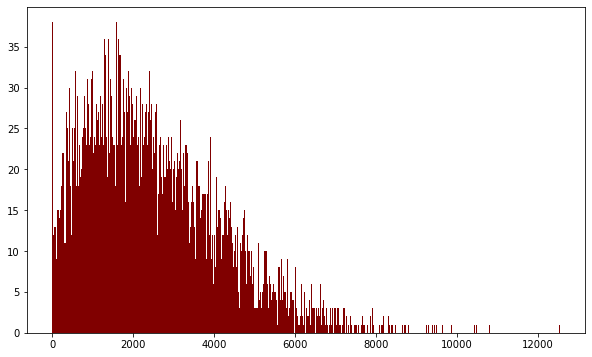

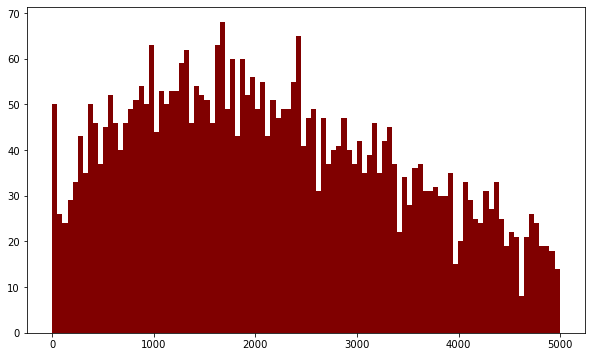

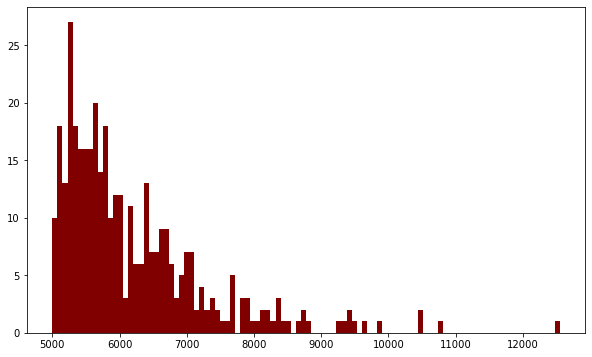

In [23]:
plt.figure(figsize = (10,6))
plt.hist(dataset["MONTHLY USAGE"], 500, color = "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

In [24]:
print(dataset.quantile(np.arange(0.0, 1.01, 0.05)))
dataset.quantile(np.arange(0.8, 1, 0.01))

      TOTAL USAGE  MONTHLY USAGE
0.00          1.0          1.000
0.05        809.4        330.175
0.10       1730.8        564.700
0.15       2775.2        802.125
0.20       3640.0       1005.400
0.25       4508.5       1221.500
0.30       5353.4       1418.000
0.35       6239.0       1631.700
0.40       7010.2       1820.700
0.45       7834.1       2021.575
0.50       8717.0       2245.500
0.55       9606.5       2446.350
0.60      10634.0       2703.500
0.65      11730.4       2966.950
0.70      12860.0       3249.400
0.75      14136.5       3569.250
0.80      15528.6       3898.300
0.85      17213.7       4311.250
0.90      19167.4       4807.050
0.95      22709.7       5677.425
1.00      50181.0      12545.250


,TOTAL USAGE,MONTHLY USAGE
0.80,15528.60,3898.300
0.81,15785.88,3988.640
0.82,16229.56,4073.000
0.83,16531.42,4153.525
0.84,16904.44,4242.250
0.85,17213.70,4311.250
0.86,17525.96,4388.780
0.87,17836.76,4474.345
0.88,18293.68,4583.060
0.89,18844.04,4715.750


In [25]:
print(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"])
dataset[dataset["MONTHLY USAGE"] <= 5000]

ATM ID
1DBA06761    5755.75
1FDAJM29     7222.75
1FDBHL31     5158.00
1FDBOM151    5117.00
1FDBOM208    5390.50
              ...   
5DEN04861    6055.00
5DEN07202    6797.00
5DEN10998    6997.75
5DEN13272    5956.25
5DEN15522    5184.75
Name: MONTHLY USAGE, Length: 372, dtype: float64


,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,3373,843.25
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,8807,2201.75
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,8013,2003.25
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,4034,1008.50
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,407,101.75
...,...,...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,8836,2209.00
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,4854,1213.50
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,3459,864.75


In [26]:
dataset[dataset["MONTHLY USAGE"] <= 5000]["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    3451
OTHER                               203
E-LOBBY                             201
PETROL PUMP                          74
FUTURE GROUP                         26
FOREIGNER TOURIST PLACE              12
MTNL                                  8
EDUCATIONAL PLACE                     7
RAILWAY STATION                       6
RELIGIOUS PLACE                       4
MARKET                                4
BUS STAND                             4
HOSPITAL                              2
AIRPORT                               1
Name: Site Category, dtype: int64

In [27]:
dataset.groupby("Site Category")["MONTHLY USAGE"].mean().sort_values()

Site Category
MTNL                                858.062500
AIRPORT                            1513.000000
RAILWAY STATION                    1532.666667
BUS STAND                          1622.562500
FUTURE GROUP                       2076.120370
PETROL PUMP                        2187.004329
HOSPITAL                           2367.000000
SITE NOT UNDER SPECIAL CATEGORY    2504.356101
OTHER                              2662.026276
EDUCATIONAL PLACE                  2779.875000
E-LOBBY                            2946.344395
FOREIGNER TOURIST PLACE            3294.153846
MARKET                             3755.333333
RELIGIOUS PLACE                    4363.250000
Name: MONTHLY USAGE, dtype: float64

In [28]:
dataset[dataset["MONTHLY USAGE"] <= 5000].groupby("Site Category")["MONTHLY USAGE"].mean().sort_values()

Site Category
MTNL                                858.062500
AIRPORT                            1513.000000
RAILWAY STATION                    1532.666667
BUS STAND                          1622.562500
FUTURE GROUP                       1952.865385
PETROL PUMP                        2019.298423
SITE NOT UNDER SPECIAL CATEGORY    2162.608954
OTHER                              2349.240558
HOSPITAL                           2367.000000
EDUCATIONAL PLACE                  2458.821429
MARKET                             2484.375000
E-LOBBY                            2540.562604
FOREIGNER TOURIST PLACE            3078.729167
RELIGIOUS PLACE                    3971.562500
Name: MONTHLY USAGE, dtype: float64

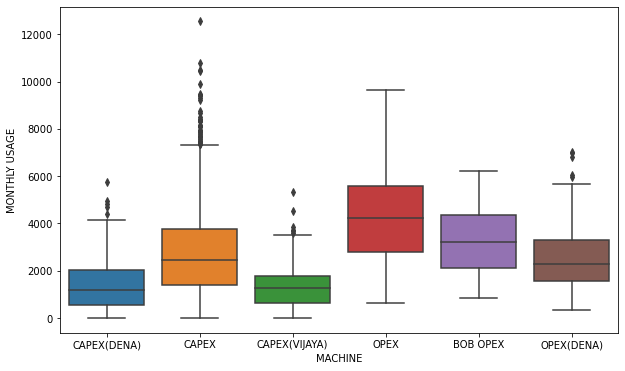

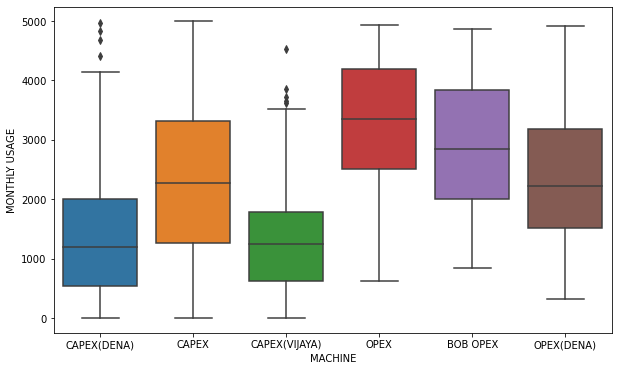

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["MACHINE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["MACHINE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

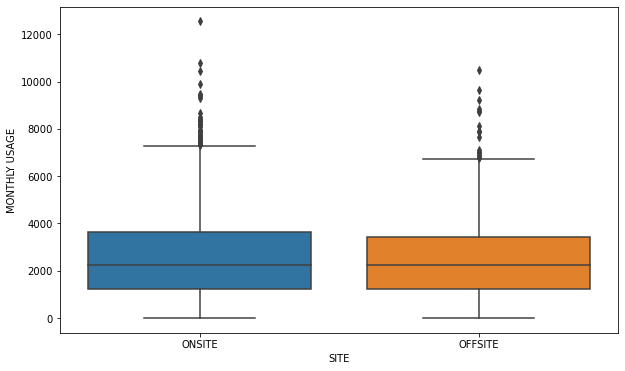

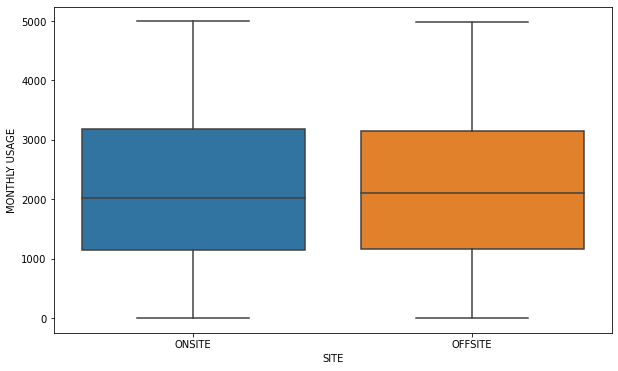

In [30]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["SITE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["SITE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

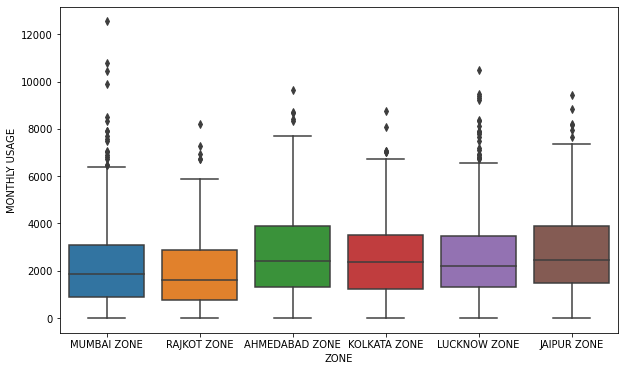

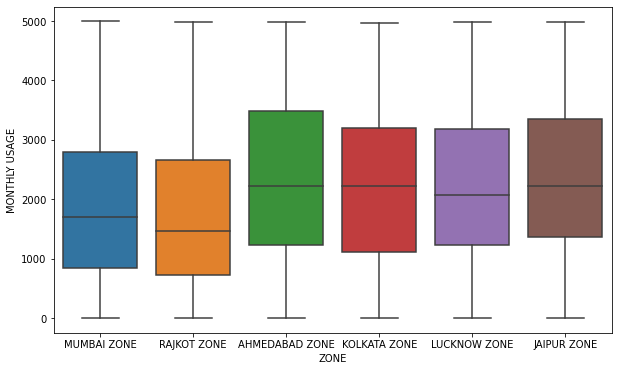

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["ZONE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["ZONE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [32]:
## descriptive analysis with error data

In [33]:
data = pd.concat(pd.read_excel("full data.xlsx", sheet_name=None), ignore_index=True)
data.columns = ['ATM ID', 'MS VENDOR', 'Operation Hours', 'Fault', 'Start', 'End', 'Duration']
data["Start"] = pd.to_datetime(data["Start"].str.strip(), format = '%m/%d/%Y %I:%M:%S %p')
data["End"] = pd.to_datetime(data["End"].str.strip(), format = '%m/%d/%Y %I:%M:%S %p')
data = data.sort_values(by = ["Start"], ignore_index = True)

p1 = pd.read_excel("p1 faults.xlsx")
p1 = p1["Fault"].tolist()
data = data[data["Fault"].isin(p1)]
data = data.reset_index().iloc[:,1:]

In [34]:
data

,ATM ID,MS VENDOR,Operation Hours,Fault,Start,End,Duration
0,1FWBDN25,AGS,06:00 hrs to 22:00 hrs,down - communication failure (NCR),2020-08-04 15:07:35,2020-08-04 15:15:14,8
1,1RDDGKP02,AGS,00:00 hrs to 23:59 hrs,All Cassette Faulted (DIEBOLD),2020-08-04 15:07:49,2020-08-04 16:16:05,69
2,1RDDKAN01,AGS,00:00 hrs to 23:59 hrs,All Cassette Faulted (DIEBOLD),2020-08-04 15:07:50,2020-08-04 16:16:06,69
3,1RDDHMP01,AGS,06:00 hrs to 22:00 hrs,Cashout (DIEBOLD),2020-08-04 15:07:50,2020-08-04 16:31:25,84
4,1RDDLUC13,AGS,06:00 hrs to 22:00 hrs,down - communication failure (DIEBOLD 10xx),2020-08-04 15:07:52,2020-08-04 15:15:31,8
...,...,...,...,...,...,...,...
380627,1CRMHMU19,AGS,00:00 hrs to 23:59 hrs,down - communication failure (NCR),2020-11-29 23:57:32,2020-11-30 06:32:58,395
380628,1CRMHTH11,AGS,00:00 hrs to 23:59 hrs,down - communication failure (NCR),2020-11-29 23:57:36,2020-11-30 00:07:56,10
380629,1FDBOM179,AGS,00:00 hrs to 23:59 hrs,down - communication failure (DIEBOLD 10xx),2020-11-29 23:58:36,2020-11-30 00:09:25,11
380630,1FDBOM208,AGS,06:00 hrs to 22:00 hrs,down - communication failure (DIEBOLD 10xx),2020-11-29 23:58:37,2020-11-30 00:09:27,11


In [35]:
atm_list = list(data["ATM ID"].unique())
end = dt.datetime(2020, 12, 1, 0, 0, 0)
full_list = []

for name in atm_list:
    s = data[data["ATM ID"] == name]
    monthly_count = []
    month = 8
    month_start = dt.datetime(2020, month, 1, 0, 0, 0)
    month_end = dt.datetime(2020, (month+1), 1, 0, 0, 0)
    while month_end <= end:
        s1 = s[s["Start"] >= month_start]
        s1 = s1[s1["Start"] < month_end]
        monthly_count.append(s1.shape[0])
        month = month + 1
        month_start = month_end
        if month<12:
            month_end = dt.datetime(2020, (month+1), 1, 0, 0, 0)
        else:
            break
    print(monthly_count)       
    full_list.append(monthly_count)
    
count = pd.DataFrame(full_list)
count.index = atm_list
count.columns = ["Month {}".format(i+1) for i in range(count.shape[1])]
count
count.to_csv("Monthly error (priority 1).csv")



[8, 45, 7, 36]
[20, 89, 12, 93]
[7, 68, 11, 92]
[9, 11, 2, 60]
[11, 75, 14, 47]
[12, 26, 7, 45]
[13, 20, 14, 18]
[24, 142, 22, 102]
[14, 70, 29, 93]
[6, 44, 14, 72]
[35, 150, 47, 219]
[17, 9, 10, 56]
[6, 15, 4, 39]
[11, 44, 5, 45]
[11, 37, 8, 28]
[6, 21, 0, 4]
[15, 74, 13, 41]
[1, 52, 12, 45]
[9, 38, 9, 60]
[18, 76, 25, 179]
[1, 33, 3, 14]
[9, 37, 5, 11]
[19, 87, 11, 64]
[7, 43, 11, 55]
[5, 57, 16, 85]
[12, 55, 17, 76]
[5, 95, 14, 75]
[13, 59, 8, 129]
[13, 25, 7, 34]
[5, 44, 3, 30]
[35, 134, 46, 242]
[8, 46, 10, 64]
[2, 71, 5, 99]
[5, 39, 6, 62]
[14, 27, 4, 32]
[11, 5, 0, 61]
[12, 22, 13, 93]
[4, 62, 8, 69]
[15, 22, 13, 28]
[14, 34, 3, 48]
[14, 25, 6, 41]
[21, 75, 31, 118]
[9, 44, 3, 22]
[12, 79, 18, 154]
[20, 5, 0, 0]
[13, 73, 31, 62]
[20, 51, 13, 41]
[42, 201, 32, 121]
[8, 57, 7, 78]
[6, 47, 10, 45]
[25, 84, 25, 120]
[4, 59, 16, 72]
[14, 57, 4, 18]
[8, 31, 11, 45]
[8, 25, 22, 82]
[9, 12, 2, 11]
[2, 25, 9, 21]
[6, 19, 10, 54]
[14, 33, 17, 42]
[16, 46, 9, 15]
[1, 34, 11, 29]
[16, 25, 1

[11, 50, 4, 42]
[15, 50, 15, 88]
[5, 31, 1, 28]
[10, 31, 12, 6]
[2, 47, 10, 48]
[13, 58, 20, 87]
[7, 64, 22, 104]
[19, 61, 5, 60]
[16, 133, 27, 87]
[9, 45, 7, 73]
[4, 12, 6, 23]
[24, 11, 0, 0]
[7, 25, 7, 0]
[13, 33, 12, 43]
[8, 29, 19, 96]
[4, 26, 0, 3]
[9, 16, 11, 20]
[18, 44, 34, 64]
[10, 61, 26, 69]
[15, 19, 12, 43]
[13, 56, 13, 28]
[8, 10, 2, 17]
[9, 38, 13, 35]
[6, 38, 23, 49]
[10, 51, 6, 43]
[15, 42, 7, 31]
[10, 38, 6, 86]
[7, 19, 9, 18]
[8, 23, 6, 24]
[17, 97, 27, 23]
[2, 9, 4, 17]
[11, 43, 13, 82]
[3, 24, 4, 44]
[6, 33, 13, 24]
[9, 17, 2, 24]
[7, 42, 15, 41]
[5, 20, 2, 48]
[4, 12, 1, 58]
[1, 37, 13, 54]
[23, 25, 0, 15]
[13, 39, 21, 124]
[10, 14, 4, 30]
[10, 14, 6, 22]
[20, 89, 3, 26]
[4, 11, 13, 31]
[2, 14, 4, 23]
[6, 31, 16, 35]
[6, 24, 2, 52]
[15, 81, 26, 67]
[11, 53, 35, 81]
[4, 60, 13, 52]
[14, 68, 17, 83]
[7, 44, 3, 67]
[10, 67, 17, 96]
[3, 50, 12, 18]
[17, 50, 1, 51]
[43, 68, 25, 42]
[15, 86, 14, 84]
[17, 63, 2, 35]
[13, 47, 3, 0]
[9, 0, 0, 0]
[22, 33, 10, 57]
[20, 155, 1

KeyboardInterrupt: 

In [1]:
error = pd.read_csv("Monthly error (priority 1).csv")
error = error.rename(columns = {error.columns[0]: "ATM ID"})
error = error.set_index("ATM ID")
error

NameError: name 'pd' is not defined

In [37]:
ticket = pd.read_csv("Monthly ticket.csv")
ticket = ticket.rename(columns = {ticket.columns[0]: "ATM ID"})
ticket = ticket.set_index("ATM ID")
ticket

,Month 1,Month 2,Month 3,Month 4
ATM ID,,,,
1RDDJAI26,8,5,0,2
1FNJNP09,11,10,2,0
1FNMAU06,1,5,11,21
1FNKAN98,7,10,10,14
1FDJDP44,6,5,9,16
...,...,...,...,...
1CRHUPVA04,0,0,0,1
1FNKAN106,0,0,0,1
1FNBNW15,0,0,0,3


In [38]:
error["Monthly Avg Error"] = round(error.mean(axis = 1),3)
error

,Month 1,Month 2,Month 3,Month 4,Monthly Avg Error
ATM ID,,,,,
1FWBDN25,8,45,7,36,24.00
1RDDGKP02,20,89,12,93,53.50
1RDDKAN01,7,68,11,92,44.50
1RDDHMP01,9,11,2,60,20.50
1RDDLUC13,11,75,14,47,36.75
...,...,...,...,...,...
1CRHKOBL03,0,0,0,59,14.75
1VD734101,0,0,0,8,2.00
1FDBOM289,0,0,0,15,3.75


In [39]:
ticket["Monthly Avg Ticket"] = round(ticket.mean(axis = 1),3)
ticket

,Month 1,Month 2,Month 3,Month 4,Monthly Avg Ticket
ATM ID,,,,,
1RDDJAI26,8,5,0,2,3.75
1FNJNP09,11,10,2,0,5.75
1FNMAU06,1,5,11,21,9.50
1FNKAN98,7,10,10,14,10.25
1FDJDP44,6,5,9,16,9.00
...,...,...,...,...,...
1CRHUPVA04,0,0,0,1,0.25
1FNKAN106,0,0,0,1,0.25
1FNBNW15,0,0,0,3,0.75


In [40]:
df = pd.merge(dataset, ticket["Monthly Avg Ticket"], right_index = True, left_index = True)
df = pd.merge(df, error["Monthly Avg Error"], right_index = True, left_index = True)
df

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Monthly Avg Ticket,Monthly Avg Error
ATM ID,,,,,,,,,
1DBA02691,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHSOL,SITE NOT UNDER SPECIAL CATEGORY,7775,1943.75,3.00,15.75
1DBA03051,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBTLOD,SITE NOT UNDER SPECIAL CATEGORY,11045,2761.25,1.25,22.75
1DBA03301,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHIMA,SITE NOT UNDER SPECIAL CATEGORY,19313,4828.25,4.75,25.75
1DBA03311,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBPRAN,SITE NOT UNDER SPECIAL CATEGORY,11195,2798.75,7.00,20.00
1DBA04021,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSHRT,SITE NOT UNDER SPECIAL CATEGORY,14050,3512.50,2.75,18.75
...,...,...,...,...,...,...,...,...,...
1VD716201,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,BLYTHA,SITE NOT UNDER SPECIAL CATEGORY,687,171.75,0.50,9.50
1VD717601,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,VJHAID,SITE NOT UNDER SPECIAL CATEGORY,425,106.25,5.00,25.75
1VW702401,CAPEX(VIJAYA),OFFSITE,JAIPUR ZONE,JODMAN,SITE NOT UNDER SPECIAL CATEGORY,2125,531.25,4.75,21.00


In [41]:
df["MACHINE"].value_counts()

CAPEX            3236
CAPEX(DENA)        27
CAPEX(VIJAYA)       8
Name: MACHINE, dtype: int64

In [63]:
ticket.loc["1VW732201","Monthly Avg Ticket"], error.loc["1VW732201","Monthly Avg Error"]

(2.5, 25.5)

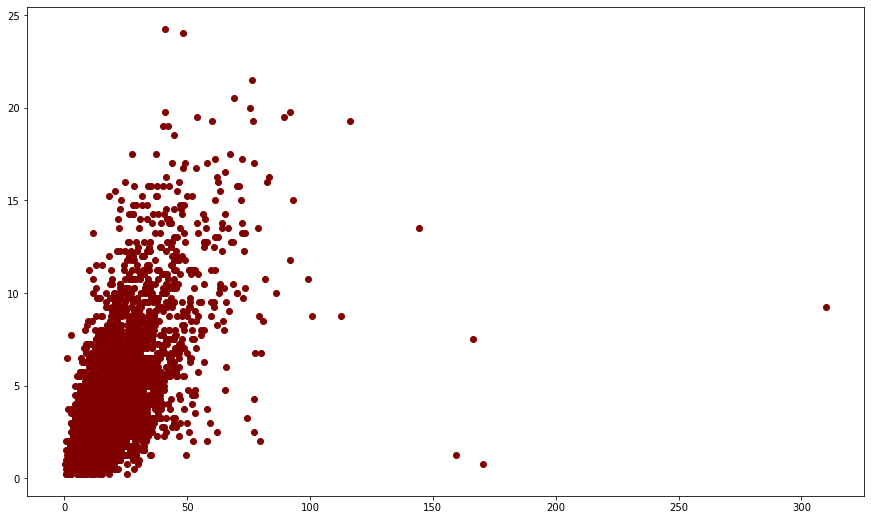

In [64]:
plt.figure(figsize = (15,9))
plt.scatter(df["Monthly Avg Error"], df["Monthly Avg Ticket"], color = "maroon")
plt.show()

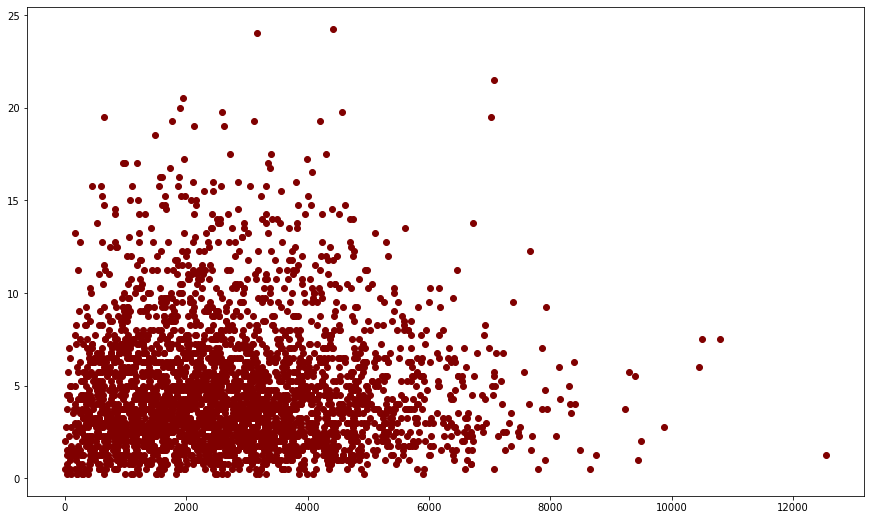

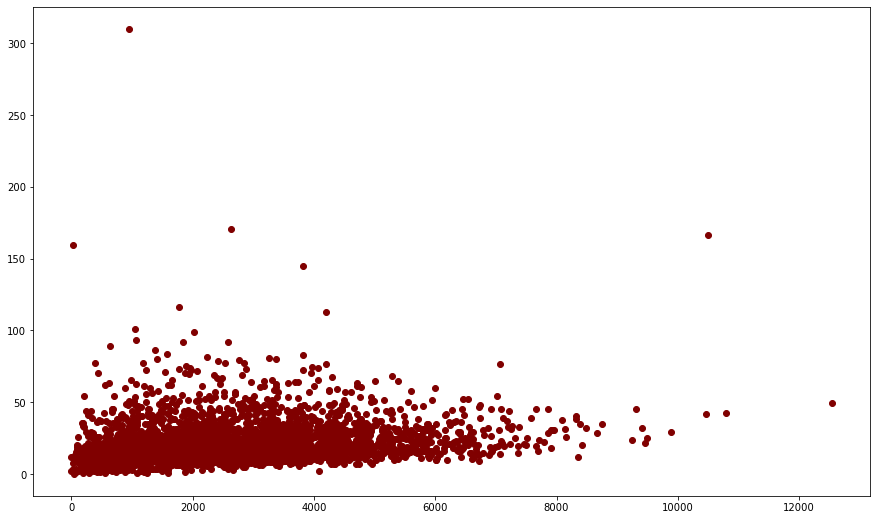

In [65]:
plt.figure(figsize = (15,9))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Monthly Avg Ticket"], color = "maroon")
plt.show()

plt.figure(figsize = (15,9))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Monthly Avg Error"], color = "maroon")
plt.show()

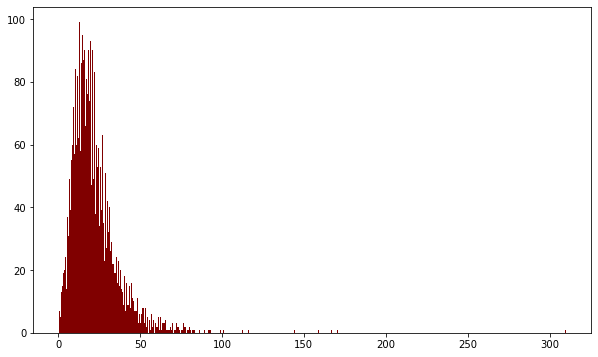

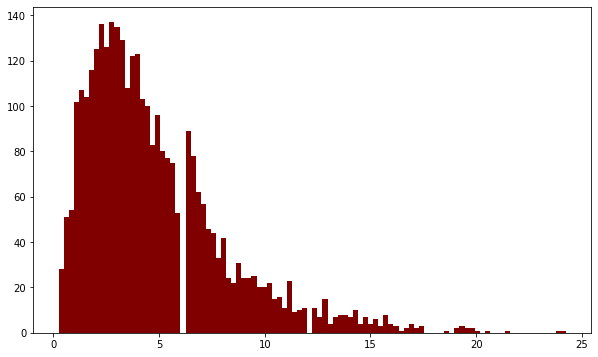

In [66]:
plt.figure(figsize = (10,6))
plt.hist(df["Monthly Avg Error"], 500, color= "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(df["Monthly Avg Ticket"], 100, color= "maroon")
plt.show()

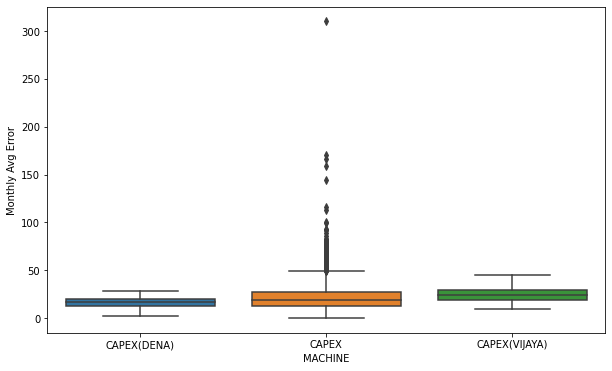

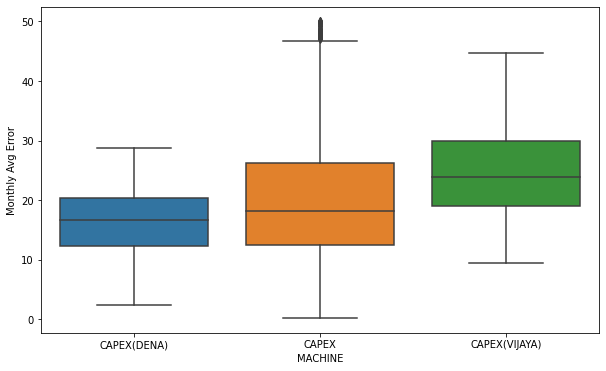

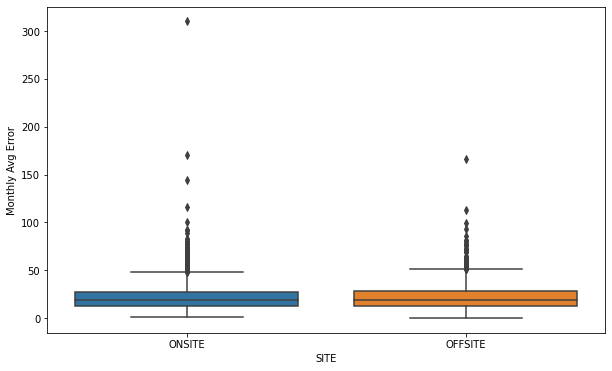

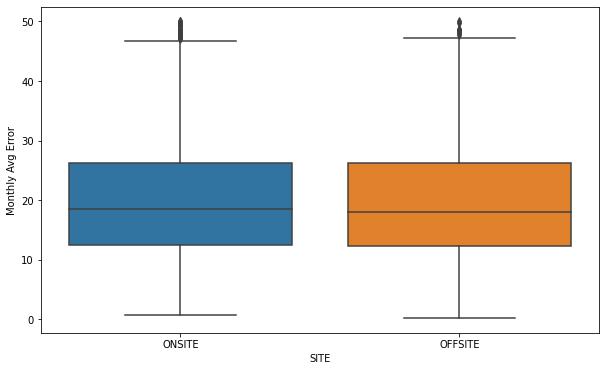

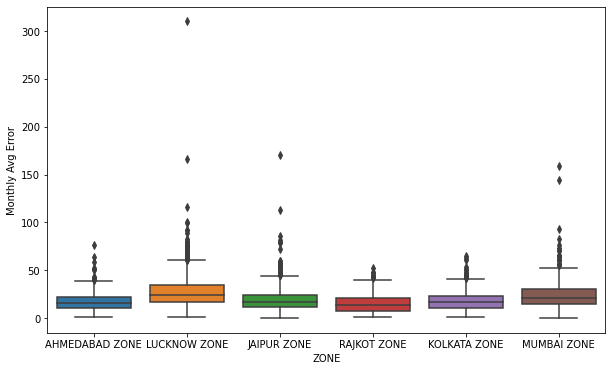

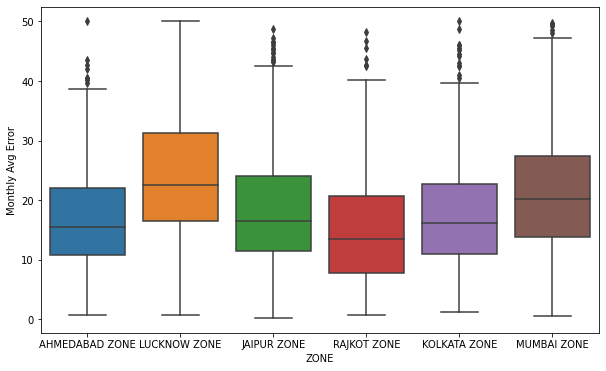

In [67]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Monthly Avg Error"]<=50]["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Monthly Avg Error"]<=50]["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Monthly Avg Error"]<=50]["Monthly Avg Error"])
plt.show()

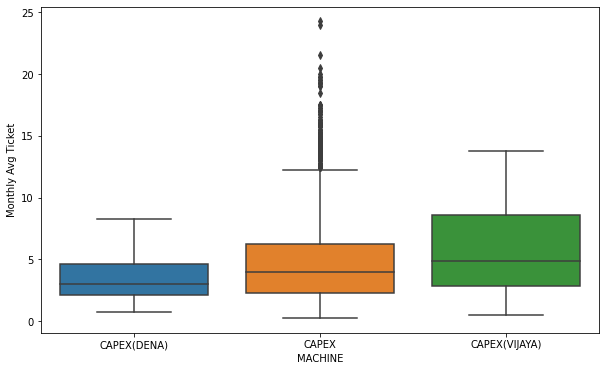

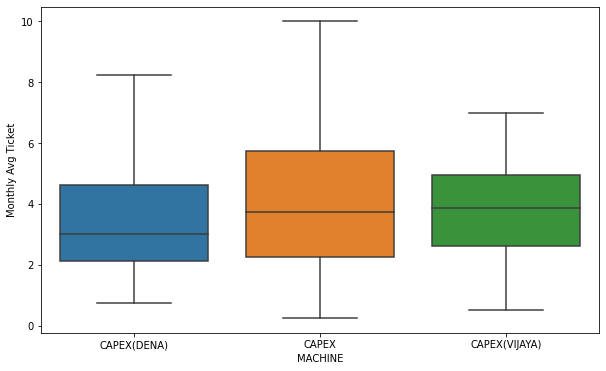

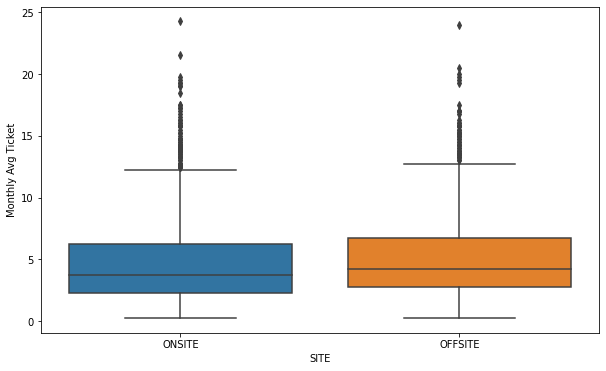

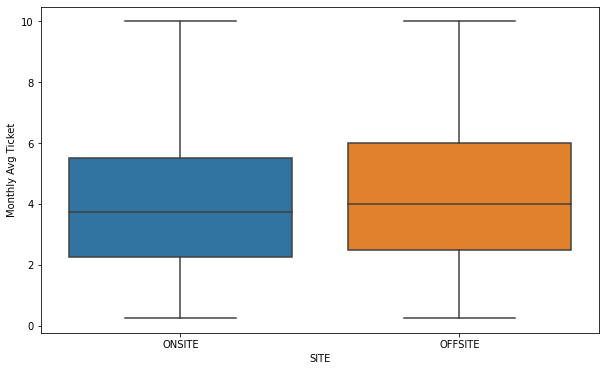

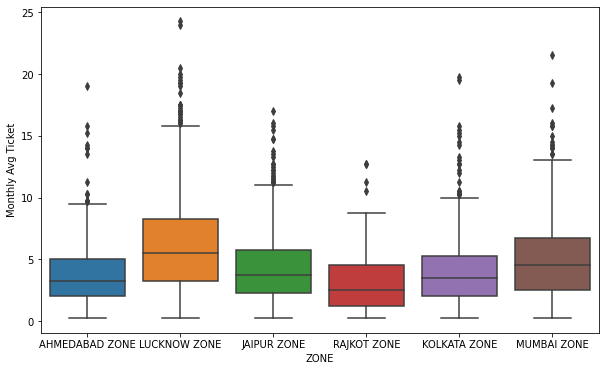

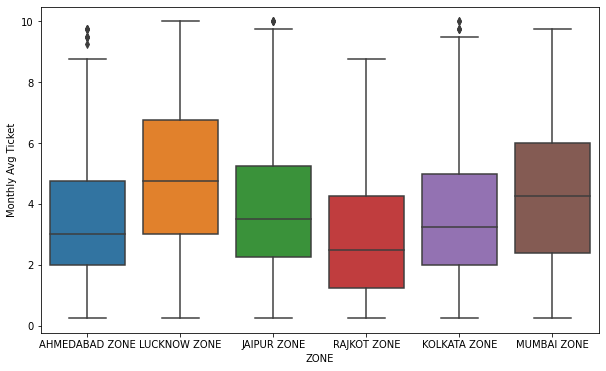

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Monthly Avg Ticket"]<=10]["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Monthly Avg Ticket"]<=10]["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Monthly Avg Ticket"]<=10]["Monthly Avg Ticket"])
plt.show()

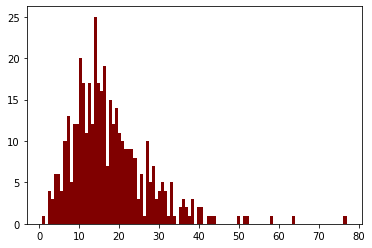

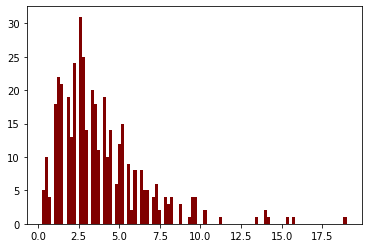

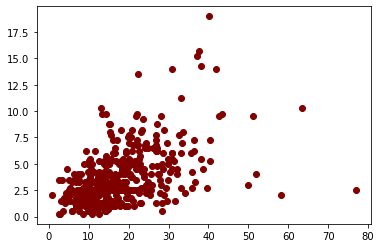

0.4801107200820576

In [80]:
ahm = df[df["ZONE"]=="AHMEDABAD ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
plt.show()
ahm.corr().iloc[3,2]

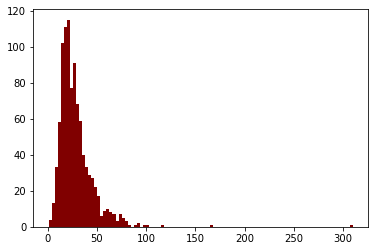

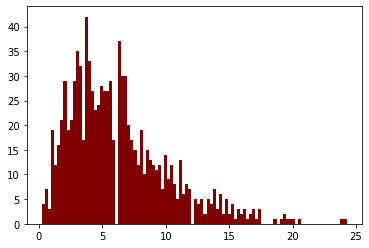

0.5308668152897134

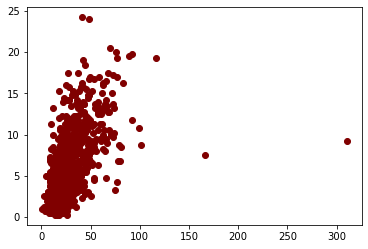

In [81]:
ahm = df[df["ZONE"]=="LUCKNOW ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
ahm.corr().iloc[3,2]

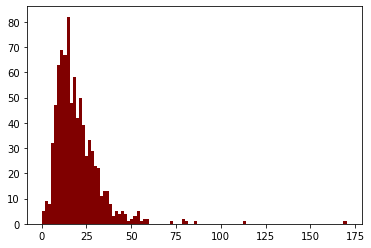

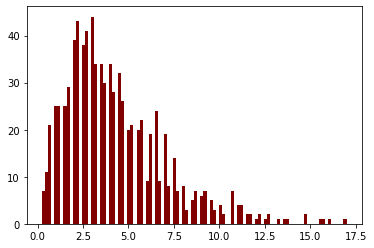

0.47958180679427875

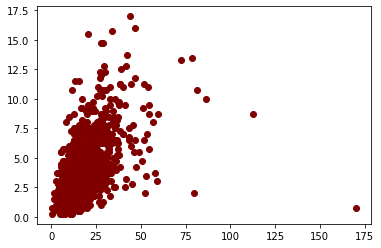

In [82]:
ahm = df[df["ZONE"]=="JAIPUR ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
ahm.corr().iloc[3,2]

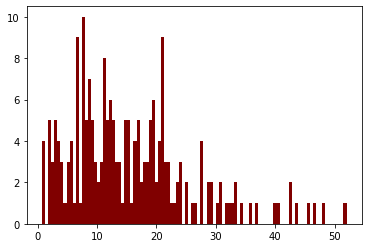

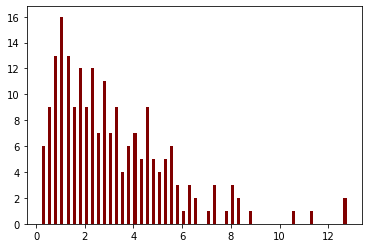

0.599949891305658

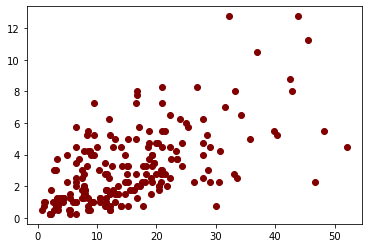

In [83]:
ahm = df[df["ZONE"]=="RAJKOT ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
ahm.corr().iloc[3,2]

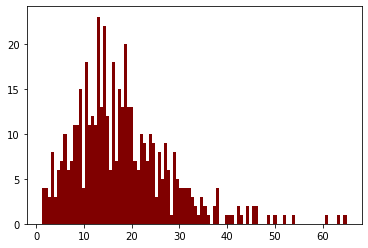

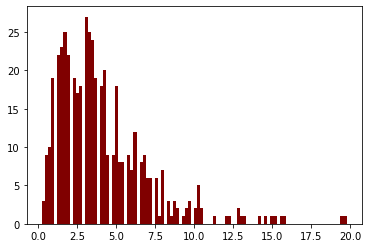

0.6485066506601664

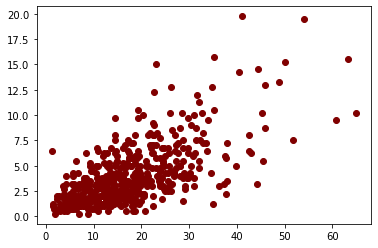

In [84]:
ahm = df[df["ZONE"]=="KOLKATA ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
ahm.corr().iloc[3,2]

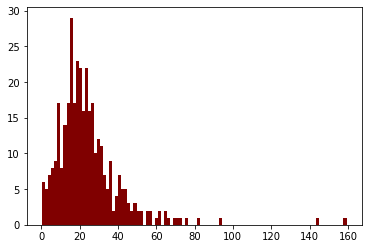

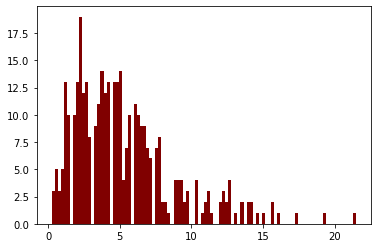

0.5780343699340853

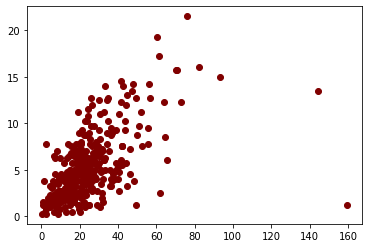

In [86]:
ahm = df[df["ZONE"]=="MUMBAI ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")
ahm.corr().iloc[3,2]

In [88]:
df.loc[(df["Monthly Avg Error"] <= 50) & (df["Monthly Avg Ticket"] <= 10)]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Monthly Avg Ticket,Monthly Avg Error
ATM ID,,,,,,,,,
1DBA02691,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHSOL,SITE NOT UNDER SPECIAL CATEGORY,7775,1943.75,3.00,15.75
1DBA03051,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBTLOD,SITE NOT UNDER SPECIAL CATEGORY,11045,2761.25,1.25,22.75
1DBA03301,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHIMA,SITE NOT UNDER SPECIAL CATEGORY,19313,4828.25,4.75,25.75
1DBA03311,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBPRAN,SITE NOT UNDER SPECIAL CATEGORY,11195,2798.75,7.00,20.00
1DBA04021,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSHRT,SITE NOT UNDER SPECIAL CATEGORY,14050,3512.50,2.75,18.75
...,...,...,...,...,...,...,...,...,...
1VD704901,CAPEX(VIJAYA),OFFSITE,JAIPUR ZONE,JAICOM,SITE NOT UNDER SPECIAL CATEGORY,127,63.50,7.00,13.00
1VD716201,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,BLYTHA,SITE NOT UNDER SPECIAL CATEGORY,687,171.75,0.50,9.50
1VD717601,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,VJHAID,SITE NOT UNDER SPECIAL CATEGORY,425,106.25,5.00,25.75


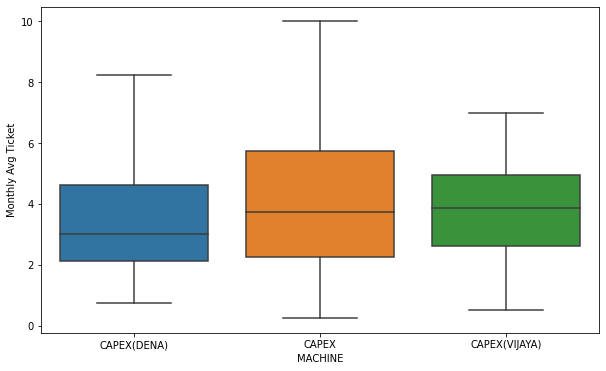

In [90]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Monthly Avg Ticket"]<=10]["Monthly Avg Ticket"])
plt.show()

#df[df["Monthly Avg Ticket"]>3]

In [32]:
df.loc[(df["Weekly Avg Error"] > 25) | (df["Weekly Avg Ticket"] > 3)]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDABN38,CAPEX,ONSITE,LUCKNOW ZONE,DAULAT,SITE NOT UNDER SPECIAL CATEGORY,4398,1099.50,3.889,14.444
1FDAJM25,CAPEX,ONSITE,JAIPUR ZONE,MAYAJM,SITE NOT UNDER SPECIAL CATEGORY,6627,1656.75,3.444,8.000
1FDAJM27,CAPEX,OFFSITE,JAIPUR ZONE,SAVAJM,SITE NOT UNDER SPECIAL CATEGORY,9674,2418.50,3.000,30.611
1FDAJM29,CAPEX,ONSITE,JAIPUR ZONE,UDAIRO,E-LOBBY,28891,7222.75,2.056,30.556
1FDAJM57,CAPEX,OFFSITE,JAIPUR ZONE,SARADH,SITE NOT UNDER SPECIAL CATEGORY,8449,2112.25,4.056,16.722
...,...,...,...,...,...,...,...,...,...
1RDWUDP12,CAPEX,OFFSITE,JAIPUR ZONE,UDAIPU,SITE NOT UNDER SPECIAL CATEGORY,3437,859.25,3.500,11.722
1RDWVAR29,CAPEX,OFFSITE,LUCKNOW ZONE,LANKA,SITE NOT UNDER SPECIAL CATEGORY,41983,10495.75,1.722,50.000
1RNDAZM06,CAPEX,ONSITE,LUCKNOW ZONE,ANWABS,SITE NOT UNDER SPECIAL CATEGORY,4878,1219.50,4.111,10.667


In [31]:
df[df["Weekly Avg Ticket"]>3]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDABN38,CAPEX,ONSITE,LUCKNOW ZONE,DAULAT,SITE NOT UNDER SPECIAL CATEGORY,4398,1099.50,3.889,14.444
1FDAJM25,CAPEX,ONSITE,JAIPUR ZONE,MAYAJM,SITE NOT UNDER SPECIAL CATEGORY,6627,1656.75,3.444,8.000
1FDAJM57,CAPEX,OFFSITE,JAIPUR ZONE,SARADH,SITE NOT UNDER SPECIAL CATEGORY,8449,2112.25,4.056,16.722
1FDAZM09,CAPEX,ONSITE,LUCKNOW ZONE,BIJAUR,SITE NOT UNDER SPECIAL CATEGORY,17485,4371.25,3.278,21.500
1FDBAH01,CAPEX,ONSITE,LUCKNOW ZONE,KAISAR,SITE NOT UNDER SPECIAL CATEGORY,4813,1203.25,3.889,26.500
...,...,...,...,...,...,...,...,...,...
1RDWPTP04,CAPEX,ONSITE,LUCKNOW ZONE,ANTU,SITE NOT UNDER SPECIAL CATEGORY,6409,1602.25,4.222,15.778
1RDWUDP12,CAPEX,OFFSITE,JAIPUR ZONE,UDAIPU,SITE NOT UNDER SPECIAL CATEGORY,3437,859.25,3.500,11.722
1RNDAZM06,CAPEX,ONSITE,LUCKNOW ZONE,ANWABS,SITE NOT UNDER SPECIAL CATEGORY,4878,1219.50,4.111,10.667


In [33]:
df[df["Weekly Avg Error"]>25]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDAJM27,CAPEX,OFFSITE,JAIPUR ZONE,SAVAJM,SITE NOT UNDER SPECIAL CATEGORY,9674,2418.50,3.000,30.611
1FDAJM29,CAPEX,ONSITE,JAIPUR ZONE,UDAIRO,E-LOBBY,28891,7222.75,2.056,30.556
1FDALD130,CAPEX,OFFSITE,LUCKNOW ZONE,PHAPHA,FUTURE GROUP,10628,2657.00,2.111,29.778
1FDBAH01,CAPEX,ONSITE,LUCKNOW ZONE,KAISAR,SITE NOT UNDER SPECIAL CATEGORY,4813,1203.25,3.889,26.500
1FDBAN03,CAPEX,ONSITE,LUCKNOW ZONE,KALUKU,SITE NOT UNDER SPECIAL CATEGORY,16969,4242.25,3.611,28.889
...,...,...,...,...,...,...,...,...,...
1RDWAHM53,CAPEX,ONSITE,AHMEDABAD ZONE,MOTERA,SITE NOT UNDER SPECIAL CATEGORY,20769,5192.25,2.833,26.944
1RDWBDN02,CAPEX,ONSITE,KOLKATA ZONE,KALNA,SITE NOT UNDER SPECIAL CATEGORY,32370,8092.50,1.444,27.722
1RDWKOL70,CAPEX,OFFSITE,KOLKATA ZONE,SODEPU,SITE NOT UNDER SPECIAL CATEGORY,28079,7019.75,4.667,30.167
